In [2]:
import numpy as np
import scipy

import toolbox
import unitconvert
from matplotlib_rc import *
from load_all_data import *

from cov import cov_ellipse_xy
from pdf_plot import get_kde_1D,get_kde_2D,plot_density_2D

Fw_exp=np.array([0.1304,0.368])
Fw_sig2=np.array([0.0052**2+0.002**2,0.013**2])
Fc_exp=np.array([0.1581,0.409])

likelihood_name=['$R_{ch}, F_{ch}, BE$','+CREX+PREX','+CREX','+PREX']
likelihood_filename=['none','all','crex','prex']

scale_chi2=scipy.stats.chi2.ppf(np.array([0.6827,0.9545,0.9973]),df=2)**0.5

In [2]:

def plot_density_1D_L(x,density_array,percentile,color,color_list,ax,marginal_axis='x',unit='',legend_loc=0,figsize_norm=1,n=30,label_text_add='',ls='-'):
    det_x=x[1]-x[0]
    density_array=density_array/(density_array.sum()*det_x)
    density_array_max=density_array.max()
    x_max=x[density_array==density_array_max]
    t = np.linspace(0, density_array_max, n)
    integral = ((density_array >= t[:, None]) * density_array).sum(axis=(1))
    f = scipy.interpolate.interp1d(integral, t)
    t_contours = f(np.array(percentile)/det_x)

    x_contours = []
    density_countours = []
    for index_list_flag in density_array>t_contours[:,None]:
        index_list=np.where(index_list_flag)[0]
        x_contours.append(x[[index_list.min(),index_list.max()]])
        density_countours.append(density_array[[index_list.min(),index_list.max()]])
    if(marginal_axis=='x'):
        line=ax.plot(x,density_array,linewidth=2*figsize_norm,color=color,label=label_text_add,ls=ls)[0]
        ax.tick_params(labelbottom=True, labelleft=False)
        #ax.legend(fontsize=20*figsize_norm,frameon=False,loc=legend_loc,ncol=2)
    return x_max,x_contours,density_countours,line

def PDF_DP(L,Sv,weights=1): #Dipole plolarizability corelation, https://journals.aps.org/prc/pdf/10.1103/PhysRevC.88.024316
    return np.exp(-0.5*(L-6.11*Sv+146)**2/(0.1*Sv**2+1**2))/(2*np.pi*(0.1*Sv**2+1**2))**0.5*weights



[[-22.22856073  44.45712146]] [54.19852518]
[[-25.03362672  29.08318398]] [40.03770082]
[[-22.32849318  30.16012885]] [26.88414443]
[[-25.87404443  38.91293297]] [66.77608073]


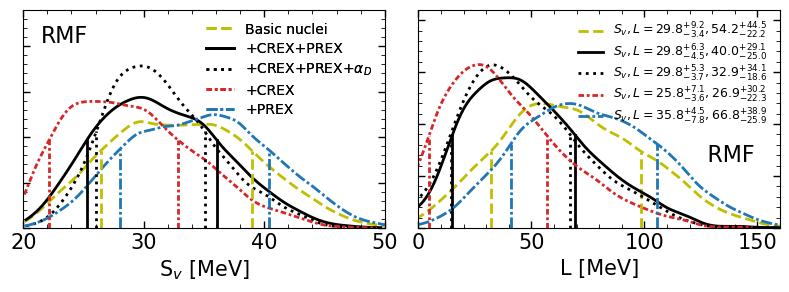

In [3]:

percentile_list = [0.68269]
color_list = ['y','k','tab:red','tab:blue','g','c']
ls_list=['--','-',(0, (2, 1, 1, 1)),(0, (4, 1, 1, 1))]
#label_list=['$R_{ch}, F_{ch}, BE$','+CREX+PREX','+CREX','+PREX']
label_list=['Basic nuclei','+CREX+PREX','+CREX','+PREX']
likelihood_name=label_list

#name='Skyrme'
#SAT_list=SAT_Skyrme_list

name='RMF'
SAT_list=SAT_RMF_to_Skyrme_list

fig, axes = plt.subplots(1,2,sharex=False,sharey=False,figsize=(8,3))
Sv_density_array_list=[]
Sv_x_contours_list=[]
Sv_x_max_list=[]
Sv_line_list=[]
for i in range(len(SAT_list)):
    x=SAT_list[i][3] #Sv
    x_grid,pdf_grid=get_kde_1D(x,1000,weights=None)
    x_max,x_contours,density_countours,line=plot_density_1D_L(x_grid,pdf_grid,percentile_list,color_list[i], [color_list[i],color_list[i]],axes[0],ls=ls_list[i],label_text_add=likelihood_name[i],unit='MeV',n=200)
    Sv_density_array_list.append(density_countours)
    Sv_x_contours_list.append(x_contours)
    Sv_x_max_list.append(x_max)
    Sv_line_list.append(line)
    if(i==1):
        #Sv_plot=np.linspace(20,50,1000)
        x_grid,pdf_grid=get_kde_1D(x,1000,weights=PDF_DP(SAT_list[i][4],SAT_list[i][3],weights=1))
        #Sv_x_max,Sv_x_contours,Sv_density_countours,Sv_line=plot_density_1D_L(Sv_plot,PDF_DP(SAT_list[i][4][np.newaxis],Sv_plot[:,np.newaxis],weights=0*SAT_list[i][4]+1).sum(axis=1),percentile_list,color_list[i], [color_list[i],color_list[i]],axes[0],label_text_add=likelihood_name[1]+'+$\\alpha_D$',unit='MeV',n=100,ls=':')
        Sv_x_max,Sv_x_contours,Sv_density_countours,line=plot_density_1D_L(x_grid,pdf_grid,percentile_list,color_list[i], [color_list[i],color_list[i]],axes[0],label_text_add=likelihood_name[1]+'+$\\alpha_D$',unit='MeV',n=200,ls=':')

#first_legend=axes[0].legend(handles=line_list,frameon=False,fontsize=10,labelspacing=0.2,loc=2)
#axes[0].add_artist(first_legend)
axes[0].set_xlim(20,50)
axes[0].set_ylim(0,0.12)
axes[0].text(0.05*(50-20)+20,0.85*0.12,name,fontsize=16)
axes[0].set_xlabel('S$_v$ [MeV]',fontsize=15)

lines=[]
for i in range(len(likelihood_name)):
    for j in range(len(x_contours)):
        axes[0].plot([Sv_x_contours_list[i][j][0],Sv_x_contours_list[i][j][0]],[0,Sv_density_array_list[i][j][0]],ls=ls_list[i],color=color_list[i],linewidth=2)
        #ax.plot([x_contours[i][1],x_contours[i][1]],[0,density_countours[i][1]],'--',color=color_list[i],linewidth=5*figsize_norm,label=label_text_add+'%.3f - %.3f'%(x_contours[i][0],x_contours[i][1])+unit)
        lines+=axes[0].plot([Sv_x_contours_list[i][j][1],Sv_x_contours_list[i][j][1]],[0,Sv_density_array_list[i][j][1]],ls=ls_list[i],color=color_list[i],linewidth=2,label=likelihood_name[i])
        if(i==1):
            axes[0].plot([Sv_x_contours[j][0],Sv_x_contours[j][0]],[0,Sv_density_countours[j][0]],':',color=color_list[i],linewidth=2)
            #ax.plot([x_contours[i][1],x_contours[i][1]],[0,density_countours[i][1]],'--',color=color_list[i],linewidth=5*figsize_norm,label=label_text_add+'%.3f - %.3f'%(x_contours[i][0],x_contours[i][1])+unit)
            lines+=axes[0].plot([Sv_x_contours[j][1],Sv_x_contours[j][1]],[0,Sv_density_countours[j][1]],':',color=color_list[i],linewidth=2,label=likelihood_name[1]+'+$\\alpha_D$')
second_legend=axes[0].legend(handles=lines,frameon=False,fontsize=10,labelspacing=0.4,loc=1)
axes[0].add_artist(second_legend)
    
density_array_list=[]
x_contours_list=[]
x_max_list=[]
line_list=[]
lines=[]
for i in range(len(SAT_list)):
    x=SAT_list[i][4] #L
    x_grid,pdf_grid=get_kde_1D(x,1000,weights=None)
    x_max,x_contours,density_countours,line=plot_density_1D_L(x_grid,pdf_grid,percentile_list,color_list[i], [color_list[i],color_list[i]],axes[1],ls=ls_list[i],label_text_add=likelihood_name[i],unit='MeV',n=200)
    density_array_list.append(density_countours)
    x_contours_list.append(x_contours)
    x_max_list.append(x_max)
    line_list.append(line)
    print(x_contours-x_max,x_max)
    for j in range(len(x_contours)):
        axes[1].plot([x_contours_list[i][j][0],x_contours_list[i][j][0]],[0,density_array_list[i][j][0]],ls=ls_list[i],color=color_list[i],linewidth=2)
        #ax.plot([x_contours[i][1],x_contours[i][1]],[0,density_countours[i][1]],'--',color=color_list[i],linewidth=5*figsize_norm,label=label_text_add+'%.3f - %.3f'%(x_contours[i][0],x_contours[i][1])+unit)
        lines+=axes[1].plot([x_contours_list[i][j][1],x_contours_list[i][j][1]],[0,density_array_list[i][j][1]],ls=ls_list[i],color=color_list[i],linewidth=2,label='$S_v,L=%.1f_{%.1f}^{+%.1f}, %.1f_{%.1f}^{+%.1f}$ '%(Sv_x_max_list[i],Sv_x_contours_list[i][j][0]-Sv_x_max_list[i],Sv_x_contours_list[i][j][1]-Sv_x_max_list[i], x_max_list[i],x_contours_list[i][j][0]-x_max_list[i],x_contours_list[i][j][1]-x_max_list[i]))
    if(i==1):
        #L_PDF_post=interpolate.UnivariateSpline(x_grid,pdf_grid,k=3,s=0)
        #ax.plot([x_contours[i][1],x_contours[i][1]],[0,density_countours[i][1]],'--',color=color_list[i],linewidth=5*figsize_norm,label=label_text_add+'%.3f - %.3f'%(x_contours[i][0],x_contours[i][1])+unit)
        #lines+=axes[1].plot([Sv_x_contours[j][1],Sv_x_contours[j][1]],[0,Sv_density_countours[j][1]],':',color=color_list[i],linewidth=2,label='$S_v=%.1f_{%.1f}^{+%.1f}$ '%(Sv_x_max,Sv_x_contours[j][0]-Sv_x_max,Sv_x_contours[j][1]-Sv_x_max)+'MeV')
        #Sv_plot=np.linspace(20,50,1000)
        x_grid,pdf_grid=get_kde_1D(x,1000,weights=PDF_DP(SAT_list[i][4],SAT_list[i][3],weights=1))
        #Sv_x_max,Sv_x_contours,Sv_density_countours,Sv_line=plot_density_1D_L(Sv_plot,PDF_DP(SAT_list[i][4][np.newaxis],Sv_plot[:,np.newaxis],weights=0*SAT_list[i][4]+1).sum(axis=1),percentile_list,color_list[i], [color_list[i],color_list[i]],axes[0],label_text_add=likelihood_name[1]+'+$\\alpha_D$',unit='MeV',n=100,ls=':')
        L_x_max,L_x_contours,L_density_countours,line=plot_density_1D_L(x_grid,pdf_grid,percentile_list,color_list[i], [color_list[i],color_list[i]],axes[1],label_text_add=likelihood_name[1]+'+$\\alpha_D$',unit='MeV',n=200,ls=':')
        axes[1].plot([L_x_contours[j][0],L_x_contours[j][0]],[0,L_density_countours[j][0]],':',color=color_list[i],linewidth=2)
        #ax.plot([x_contours[i][1],x_contours[i][1]],[0,density_countours[i][1]],'--',color=color_list[i],linewidth=5*figsize_norm,label=label_text_add+'%.3f - %.3f'%(x_contours[i][0],x_contours[i][1])+unit)
        lines+=axes[1].plot([L_x_contours[j][1],L_x_contours[j][1]],[0,L_density_countours[j][1]],':',color=color_list[i],linewidth=2,label='$S_v,L=%.1f_{%.1f}^{+%.1f}, %.1f_{%.1f}^{+%.1f}$'%(Sv_x_max,Sv_x_contours[j][0]-Sv_x_max,Sv_x_contours[j][1]-Sv_x_max, L_x_max,L_x_contours[j][0]-L_x_max,L_x_contours[j][1]-L_x_max))

        
axes[1].legend(handles=lines,frameon=False,fontsize=9,labelspacing=0.1,loc=1)
#axes[1].set_xlim(x_grid[0],x_grid[-1])
axes[1].set_xlim(0,160)
axes[1].set_ylim(0,0.021)
axes[1].text(0.72*160,0.32*0.02,' '*(10-2*len(name))+name,fontsize=16)
axes[1].set_xlabel('L [MeV]',fontsize=15)

fig.tight_layout(pad=1.0)

fig.savefig('./figures/Sv_L_posterior_'+name+'.pdf',bbox_inches = 'tight',format='pdf')

#Sv_PDF_post_Skyrme=Sv_PDF_post
#L_PDF_post_Skyrme=L_PDF_post


[[-26.678478    35.12103433]] [56.58082067]
[[-22.49127297  21.26892118]] [35.9491778]
[[-14.60625154  25.80437772]] [21.66114762]
[[-26.7471772   29.76094364]] [72.36653698]


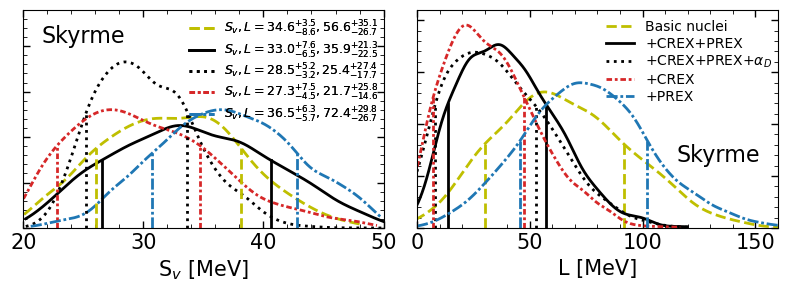

In [4]:
percentile_list = [0.68269]
color_list = ['y','k','tab:red','tab:blue','g','c']
ls_list=['--','-',(0, (2, 1, 1, 1)),(0, (4, 1, 1, 1))]
#label_list=['$R_{ch}, F_{ch}, BE$','+CREX+PREX','+CREX','+PREX']
label_list=['Basic nuclei','+CREX+PREX','+CREX','+PREX']
likelihood_name=label_list

name='Skyrme'
SAT_list=SAT_Skyrme_list

fig, axes = plt.subplots(1,2,sharex=False,sharey=False,figsize=(8,3))
density_array_list=[]
x_contours_list=[]
x_max_list=[]
line_list=[]
lines=[]
for i in range(len(SAT_list)):
    x=SAT_list[i][4] #L
    x_grid,pdf_grid=get_kde_1D(x,1000,weights=None)
    x_max,x_contours,density_countours,line=plot_density_1D_L(x_grid,pdf_grid,percentile_list,color_list[i], [color_list[i],color_list[i]],axes[1],ls=ls_list[i],label_text_add=likelihood_name[i],unit='MeV',n=200)
    density_array_list.append(density_countours)
    x_contours_list.append(x_contours)
    x_max_list.append(x_max)
    line_list.append(line)
    print(x_contours-x_max,x_max)
    for j in range(len(x_contours)):
        axes[1].plot([x_contours_list[i][j][0],x_contours_list[i][j][0]],[0,density_array_list[i][j][0]],ls=ls_list[i],color=color_list[i],linewidth=2)
        #ax.plot([x_contours[i][1],x_contours[i][1]],[0,density_countours[i][1]],'--',color=color_list[i],linewidth=5*figsize_norm,label=label_text_add+'%.3f - %.3f'%(x_contours[i][0],x_contours[i][1])+unit)
        lines+=axes[1].plot([x_contours_list[i][j][1],x_contours_list[i][j][1]],[0,density_array_list[i][j][1]],ls=ls_list[i],color=color_list[i],linewidth=2,label=likelihood_name[i])
    if(i==1):
        #L_PDF_post=interpolate.UnivariateSpline(x_grid,pdf_grid,k=3,s=0)
        #ax.plot([x_contours[i][1],x_contours[i][1]],[0,density_countours[i][1]],'--',color=color_list[i],linewidth=5*figsize_norm,label=label_text_add+'%.3f - %.3f'%(x_contours[i][0],x_contours[i][1])+unit)
        #lines+=axes[1].plot([Sv_x_contours[j][1],Sv_x_contours[j][1]],[0,Sv_density_countours[j][1]],':',color=color_list[i],linewidth=2,label='$S_v=%.1f_{%.1f}^{+%.1f}$ '%(Sv_x_max,Sv_x_contours[j][0]-Sv_x_max,Sv_x_contours[j][1]-Sv_x_max)+'MeV')
        #Sv_plot=np.linspace(20,50,1000)
        x_grid,pdf_grid=get_kde_1D(x,1000,weights=PDF_DP(SAT_list[i][4],SAT_list[i][3],weights=1))
        #Sv_x_max,Sv_x_contours,Sv_density_countours,Sv_line=plot_density_1D_L(Sv_plot,PDF_DP(SAT_list[i][4][np.newaxis],Sv_plot[:,np.newaxis],weights=0*SAT_list[i][4]+1).sum(axis=1),percentile_list,color_list[i], [color_list[i],color_list[i]],axes[0],label_text_add=likelihood_name[1]+'+$\\alpha_D$',unit='MeV',n=100,ls=':')
        L_x_max,L_x_contours,L_density_countours,line=plot_density_1D_L(x_grid,pdf_grid,percentile_list,color_list[i], [color_list[i],color_list[i]],axes[1],label_text_add=likelihood_name[1]+'+$\\alpha_D$',unit='MeV',n=200,ls=':')
        axes[1].plot([L_x_contours[j][0],L_x_contours[j][0]],[0,L_density_countours[j][0]],':',color=color_list[i],linewidth=2)
        #ax.plot([x_contours[i][1],x_contours[i][1]],[0,density_countours[i][1]],'--',color=color_list[i],linewidth=5*figsize_norm,label=label_text_add+'%.3f - %.3f'%(x_contours[i][0],x_contours[i][1])+unit)
        lines+=axes[1].plot([L_x_contours[j][1],L_x_contours[j][1]],[0,L_density_countours[j][1]],':',color=color_list[i],linewidth=2,label=likelihood_name[1]+'+$\\alpha_D$')

        
axes[1].legend(handles=lines,frameon=False,fontsize=10,labelspacing=0.2,loc='upper right', bbox_to_anchor=(1.02, 1.01))
#axes[1].set_xlim(x_grid[0],x_grid[-1])
axes[1].set_xlim(0,160)
axes[1].set_ylim(0,0.021)
axes[1].text(0.72*160,0.32*0.02,' '*(10-2*len(name))+name,fontsize=16)
axes[1].set_xlabel('L [MeV]',fontsize=15)


Sv_density_array_list=[]
Sv_x_contours_list=[]
Sv_x_max_list=[]
Sv_line_list=[]
for i in range(len(SAT_list)):
    x=SAT_list[i][3] #Sv
    x_grid,pdf_grid=get_kde_1D(x,1000,weights=None)
    x_max,x_contours,density_countours,line=plot_density_1D_L(x_grid,pdf_grid,percentile_list,color_list[i], [color_list[i],color_list[i]],axes[0],ls=ls_list[i],label_text_add=likelihood_name[i],unit='MeV',n=200)
    Sv_density_array_list.append(density_countours)
    Sv_x_contours_list.append(x_contours)
    Sv_x_max_list.append(x_max)
    Sv_line_list.append(line)
    if(i==1):
        #Sv_plot=np.linspace(20,50,1000)
        x_grid,pdf_grid=get_kde_1D(x,1000,weights=PDF_DP(SAT_list[i][4],SAT_list[i][3],weights=1))
        #Sv_x_max,Sv_x_contours,Sv_density_countours,Sv_line=plot_density_1D_L(Sv_plot,PDF_DP(SAT_list[i][4][np.newaxis],Sv_plot[:,np.newaxis],weights=0*SAT_list[i][4]+1).sum(axis=1),percentile_list,color_list[i], [color_list[i],color_list[i]],axes[0],label_text_add=likelihood_name[1]+'+$\\alpha_D$',unit='MeV',n=100,ls=':')
        Sv_x_max,Sv_x_contours,Sv_density_countours,line=plot_density_1D_L(x_grid,pdf_grid,percentile_list,color_list[i], [color_list[i],color_list[i]],axes[0],label_text_add=likelihood_name[1]+'+$\\alpha_D$',unit='MeV',n=200,ls=':')

#first_legend=axes[0].legend(handles=line_list,frameon=False,fontsize=10,labelspacing=0.2,loc=2)
#axes[0].add_artist(first_legend)
axes[0].set_xlim(20,50)
axes[0].set_ylim(0,0.12)
axes[0].text(0.05*(50-20)+20,0.85*0.12,name,fontsize=16)
axes[0].set_xlabel('S$_v$ [MeV]',fontsize=15)

lines=[]
for i in range(len(likelihood_name)):
    for j in range(len(x_contours)):
        axes[0].plot([Sv_x_contours_list[i][j][0],Sv_x_contours_list[i][j][0]],[0,Sv_density_array_list[i][j][0]],ls=ls_list[i],color=color_list[i],linewidth=2)
        #ax.plot([x_contours[i][1],x_contours[i][1]],[0,density_countours[i][1]],'--',color=color_list[i],linewidth=5*figsize_norm,label=label_text_add+'%.3f - %.3f'%(x_contours[i][0],x_contours[i][1])+unit)
        lines+=axes[0].plot([Sv_x_contours_list[i][j][1],Sv_x_contours_list[i][j][1]],[0,Sv_density_array_list[i][j][1]],ls=ls_list[i],color=color_list[i],linewidth=2,label='$S_v,L=%.1f_{%.1f}^{+%.1f}, %.1f_{%.1f}^{+%.1f}$ '%(Sv_x_max_list[i],Sv_x_contours_list[i][j][0]-Sv_x_max_list[i],Sv_x_contours_list[i][j][1]-Sv_x_max_list[i], x_max_list[i],x_contours_list[i][j][0]-x_max_list[i],x_contours_list[i][j][1]-x_max_list[i]))
        if(i==1):
            axes[0].plot([Sv_x_contours[j][0],Sv_x_contours[j][0]],[0,Sv_density_countours[j][0]],':',color=color_list[i],linewidth=2)
            #ax.plot([x_contours[i][1],x_contours[i][1]],[0,density_countours[i][1]],'--',color=color_list[i],linewidth=5*figsize_norm,label=label_text_add+'%.3f - %.3f'%(x_contours[i][0],x_contours[i][1])+unit)
            lines+=axes[0].plot([Sv_x_contours[j][1],Sv_x_contours[j][1]],[0,Sv_density_countours[j][1]],':',color=color_list[i],linewidth=2,label='$S_v,L=%.1f_{%.1f}^{+%.1f}, %.1f_{%.1f}^{+%.1f}$'%(Sv_x_max,Sv_x_contours[j][0]-Sv_x_max,Sv_x_contours[j][1]-Sv_x_max, L_x_max,L_x_contours[j][0]-L_x_max,L_x_contours[j][1]-L_x_max))
second_legend=axes[0].legend(handles=lines,frameon=False,fontsize=9,labelspacing=0.1,loc='upper right', bbox_to_anchor=(1.02, 1.01))
axes[0].add_artist(second_legend)

fig.tight_layout(pad=1.0)

fig.savefig('./figures/Sv_L_posterior_'+name+'.pdf',bbox_inches = 'tight',format='pdf')

In [5]:
#Show Sv-L posterior with PREX and CREX:
for SAT in [SAT_Skyrme_list[1],SAT_RMF_to_Skyrme_list[1],SAT_RMF_list[1]]:
    mean=np.mean(SAT[3:5],axis=1)
    cov =np.cov(SAT[3],SAT[4])#,SAT_RMF_to_Skyrme_list
    print(mean,cov)

[34.1403562 40.3024777] [[ 42.19991969  83.52975473]
 [ 83.52975473 453.23480257]]
[31.42158453 49.13189107] [[ 26.71305169  92.79344187]
 [ 92.79344187 749.8499721 ]]
[ 39.21816128 -10.08244647] [[  60.26530628 -105.82394433]
 [-105.82394433 2354.43845758]]


[32.77900096 66.82662838] [[ 34.96167206 136.75320432]
 [136.75320432 976.4023266 ]]


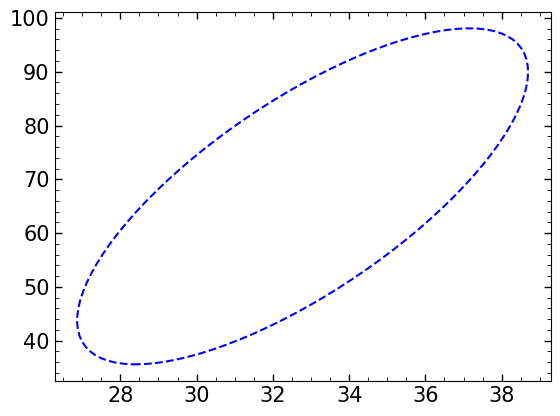

In [6]:
#Show Sv-L posterior with Basic nucli constraints:
for SAT in [np.concatenate((SAT_Skyrme_list[0],SAT_RMF_to_Skyrme_list[0][:,::10]),axis=1)]:
    mean=np.mean(SAT[3:5],axis=1)
    cov =np.cov(SAT[3],SAT[4])#,SAT_RMF_to_Skyrme_list
    print(mean,cov)
    x,y=cov_ellipse_xy(mean,cov)
    plt.plot(x,y,'--b',label='RMF')

In [7]:
def normal(FcFw_Pb,FcFw_Ca):
    part3=-0.5*((FcFw_Ca-(Fc_exp[0]-Fw_exp[0]))**2/Fw_sig2[0])
    part4=-0.5*((FcFw_Pb-(Fc_exp[1]-Fw_exp[1]))**2/Fw_sig2[1])
    return np.exp(part3+part4)
def distribution(det_x,det_y,x_grid,y_grid,pdf_grid,pdf_function):
    return (pdf_grid*(pdf_function(x_grid+det_x,y_grid+det_y))).sum()

dimension=1
def discrepancy_sig(n_sigma,discrepancy,dimension=1):
    return scipy.special.gammainc(dimension/2,n_sigma**2/2) - discrepancy

['95.45' '90.0' '68.27' '30.0']
[3.41296430e-05 6.69900905e-05 1.90477190e-04 3.82325601e-04]
['95.45' '90.0' '68.27' '30.0']
[3.58176538e-05 7.26046254e-05 1.99614937e-04 4.07239349e-04]
['95.45' '90.0' '68.27' '30.0']
[3.46224025e-05 7.11831546e-05 1.97704966e-04 4.17419706e-04]
['95.45' '90.0' '68.27' '30.0']
[3.42866694e-05 7.28949447e-05 2.20050077e-04 4.81429380e-04]
discrepancy:
[0.99758352 0.93534285 0.97576861 0.99358055]
[3.03360763 1.8476213  2.25344046 2.72554979]
['95.45' '90.0' '68.27' '30.0']
[3.63940451e-05 7.18120417e-05 2.03007325e-04 4.89894953e-04]
['95.45' '90.0' '68.27' '30.0']
[3.36621251e-05 6.75055237e-05 1.99928137e-04 3.83128663e-04]
['95.45' '90.0' '68.27' '30.0']
[3.44100485e-05 6.45700366e-05 1.72366892e-04 3.20490870e-04]
['95.45' '90.0' '68.27' '30.0']
[3.73099490e-05 7.25232625e-05 2.17844822e-04 5.27913574e-04]
discrepancy:
[0.96797957 0.76028388 0.80019743 0.97115723]
[2.14415553 1.17569666 1.28211425 2.18562891]


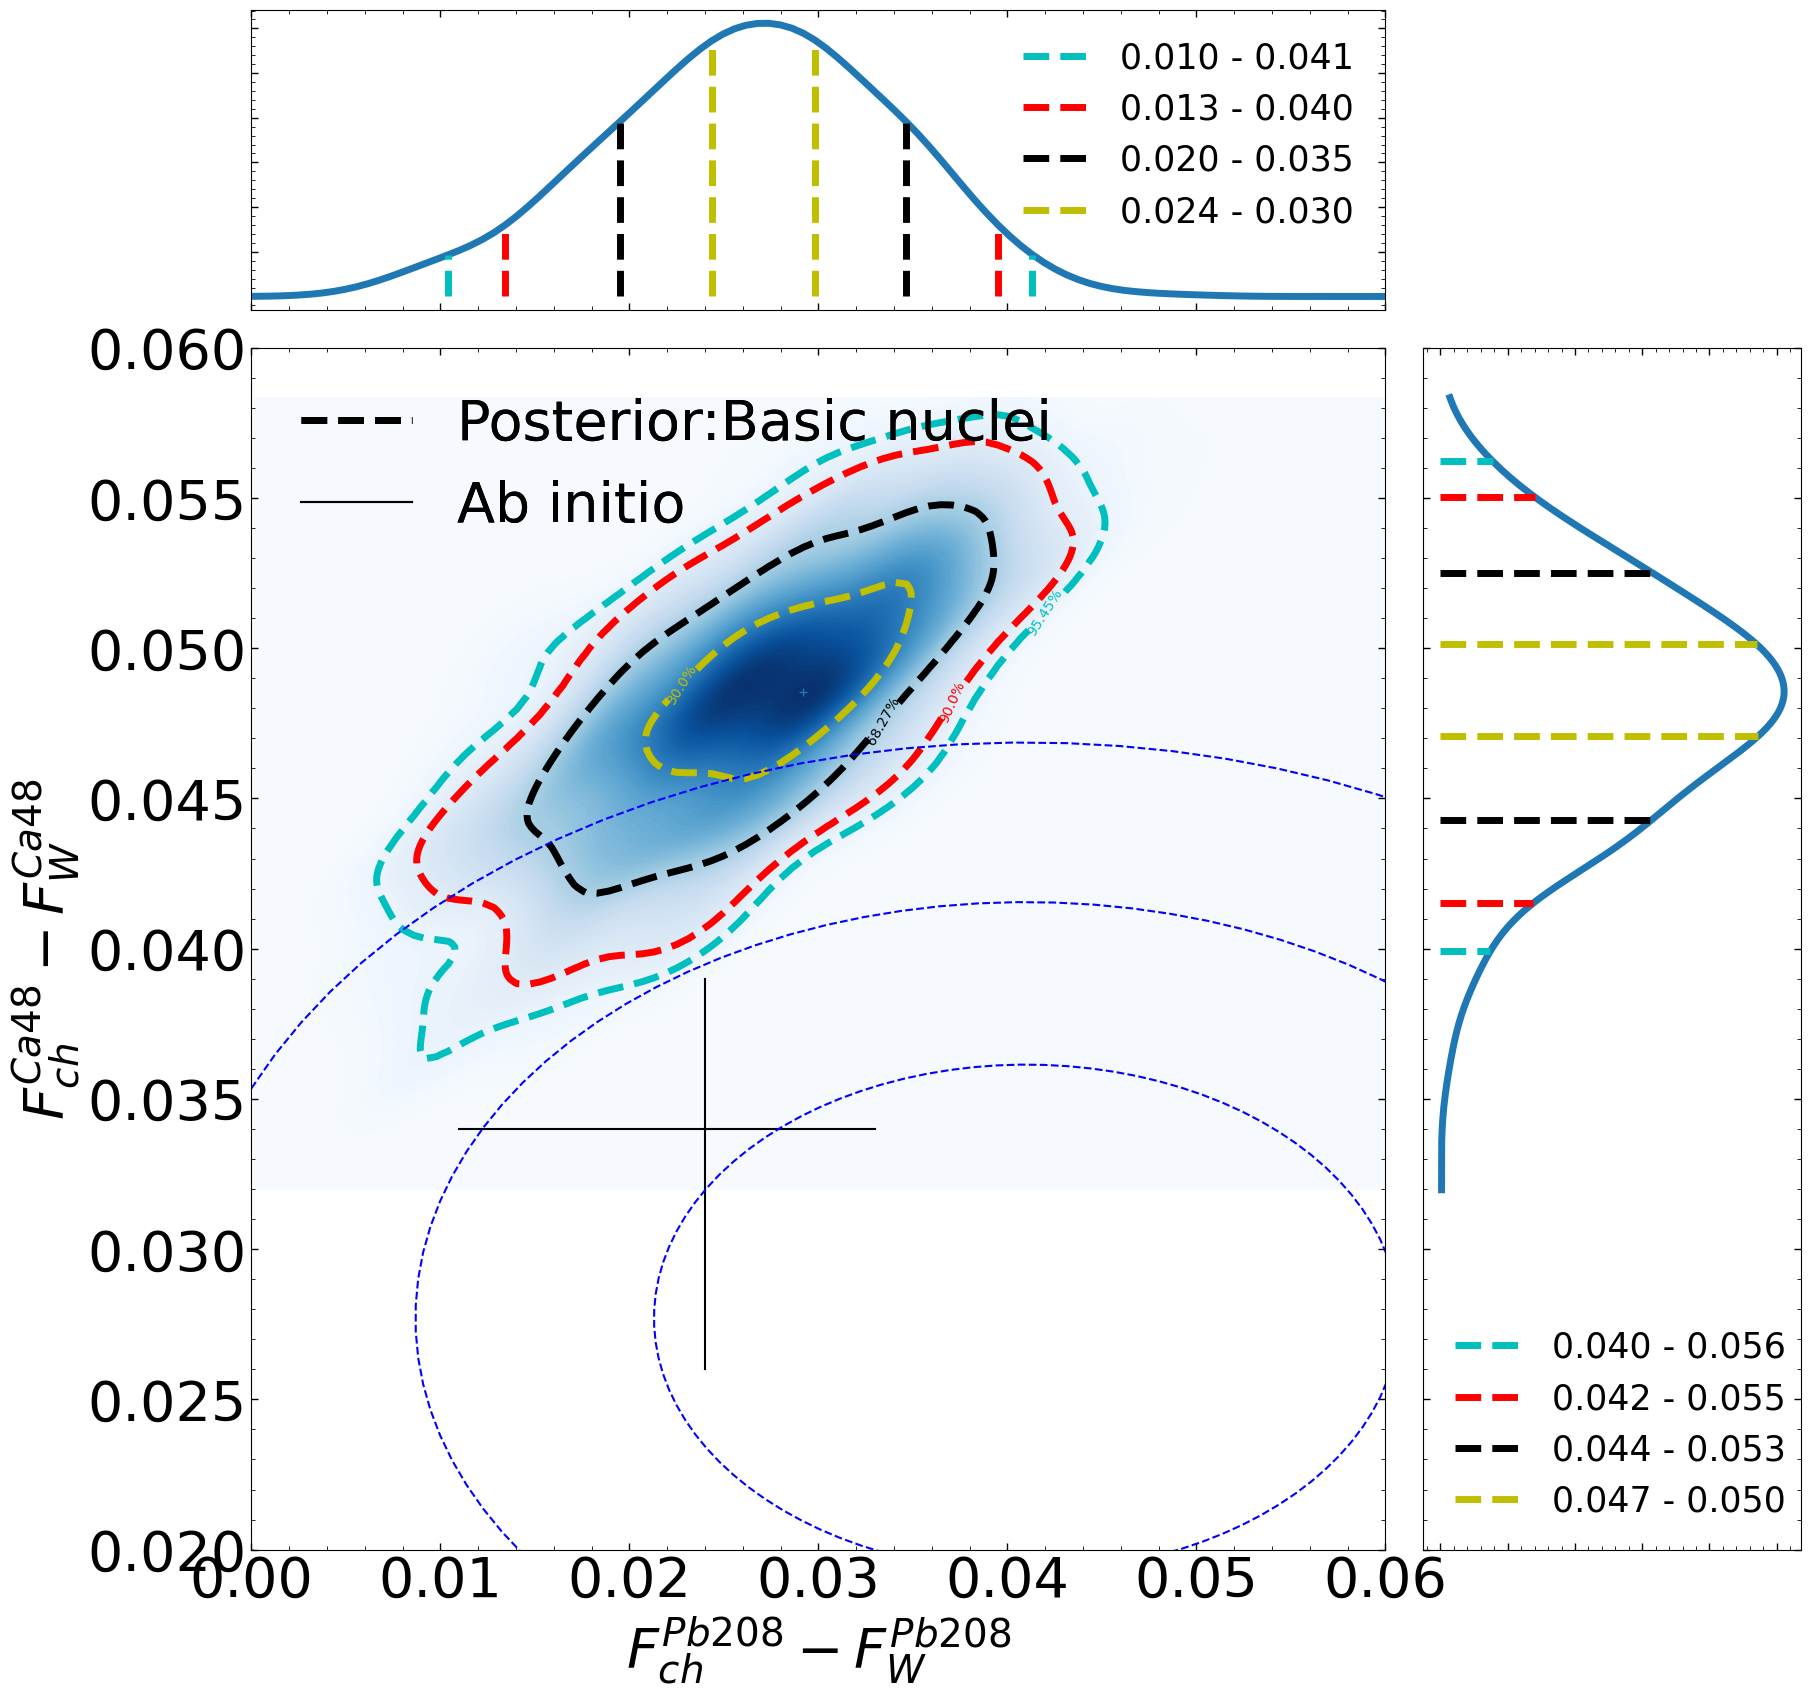

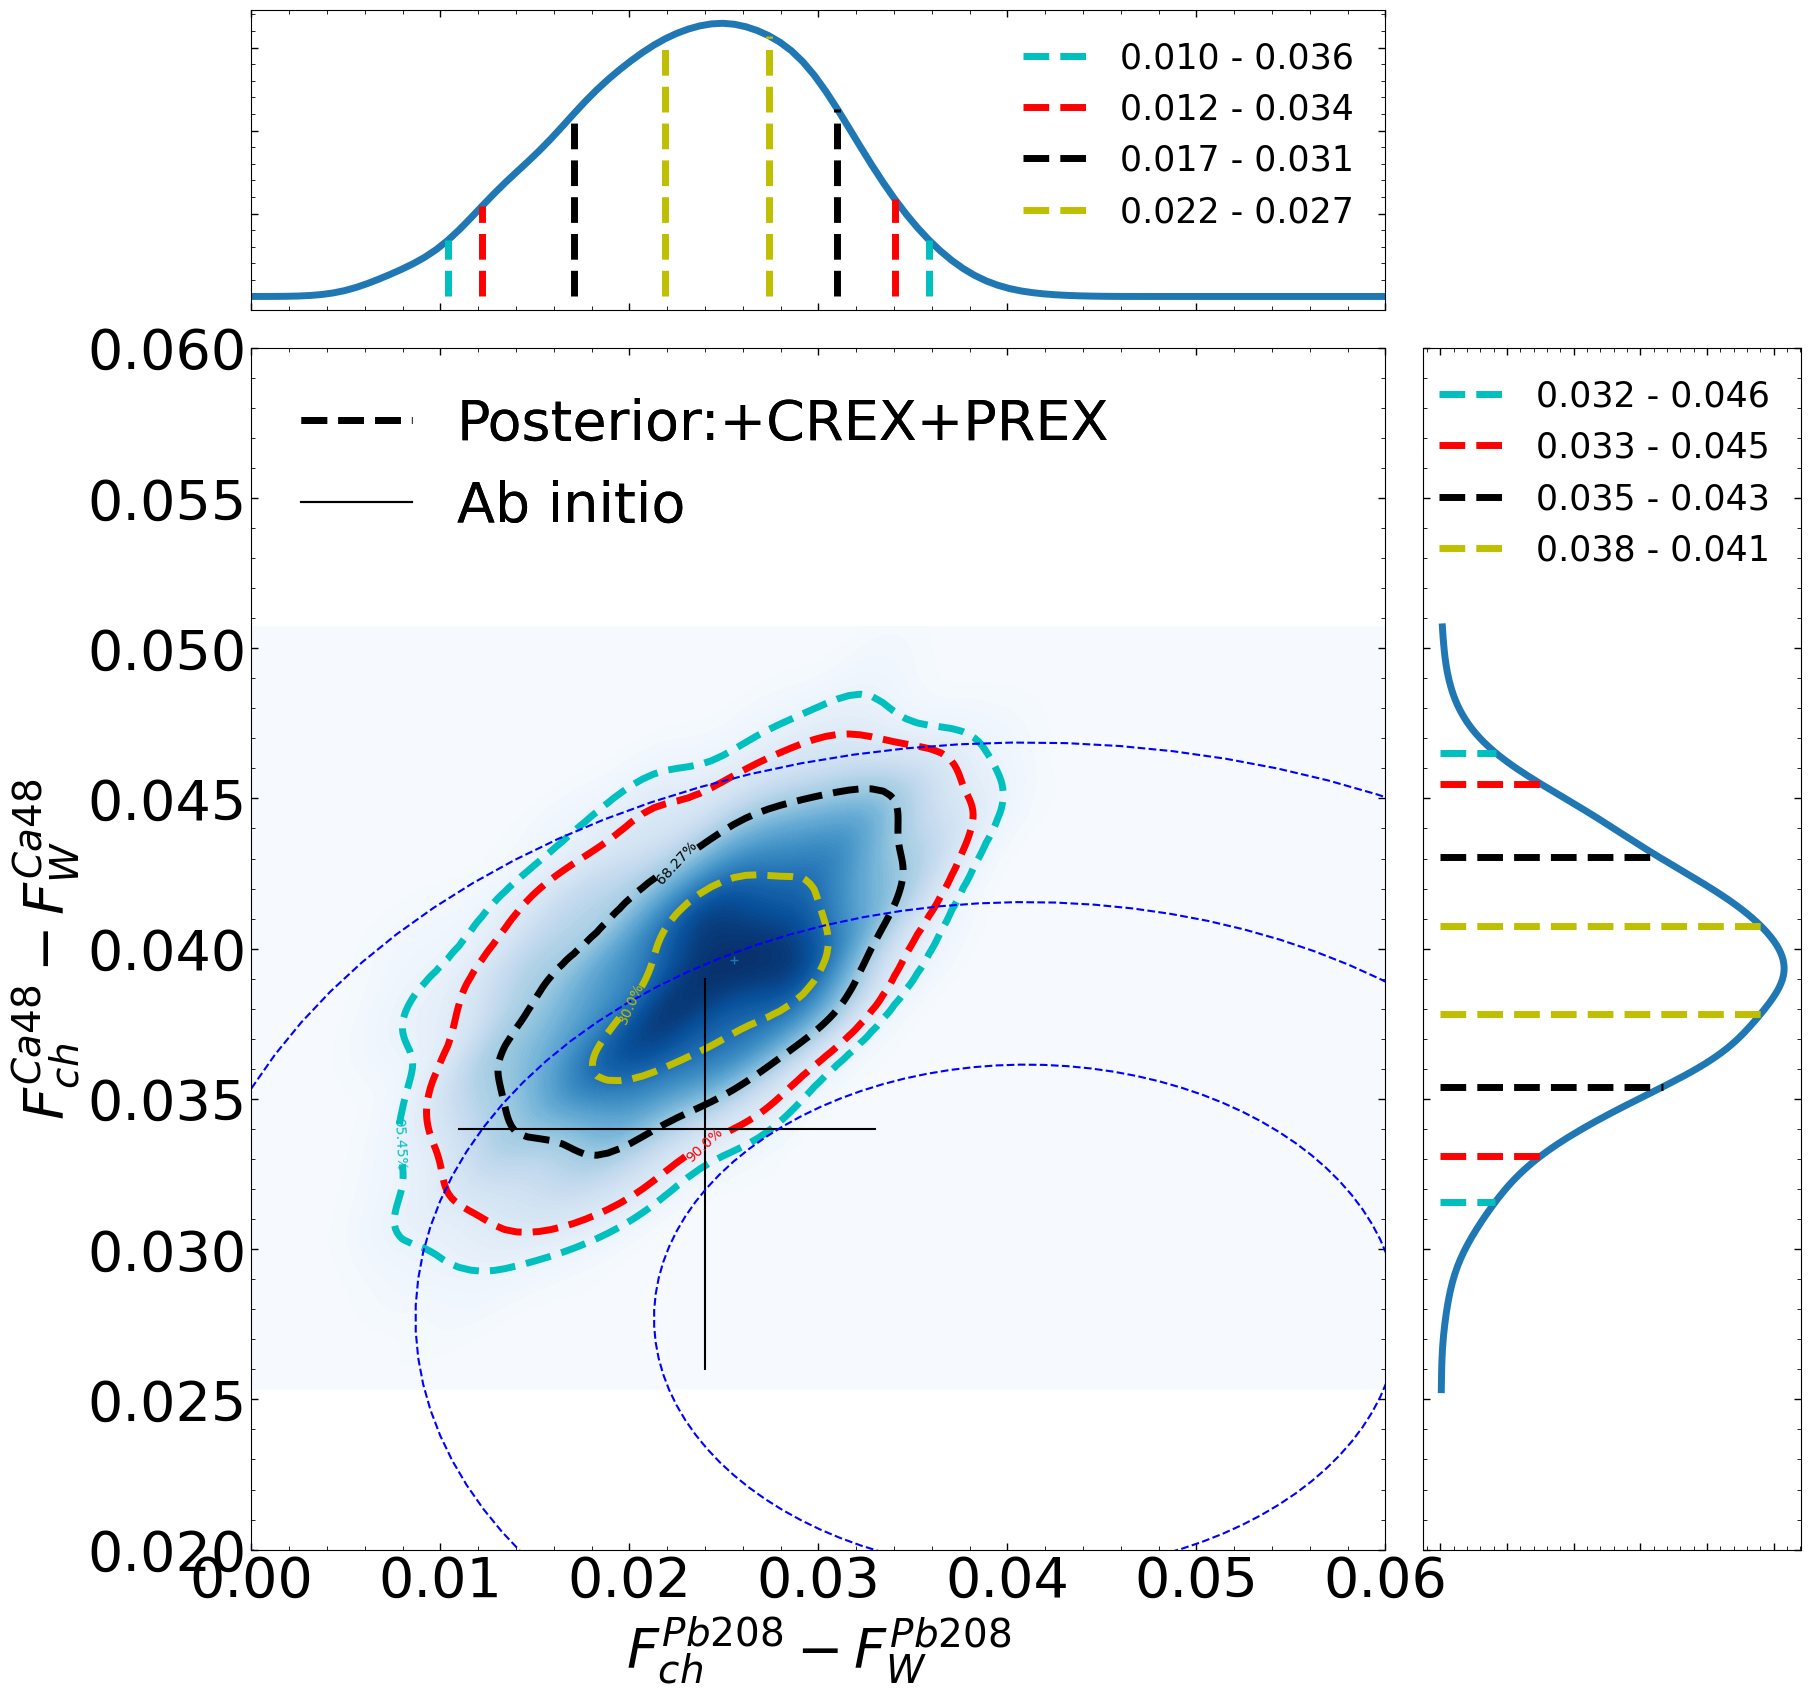

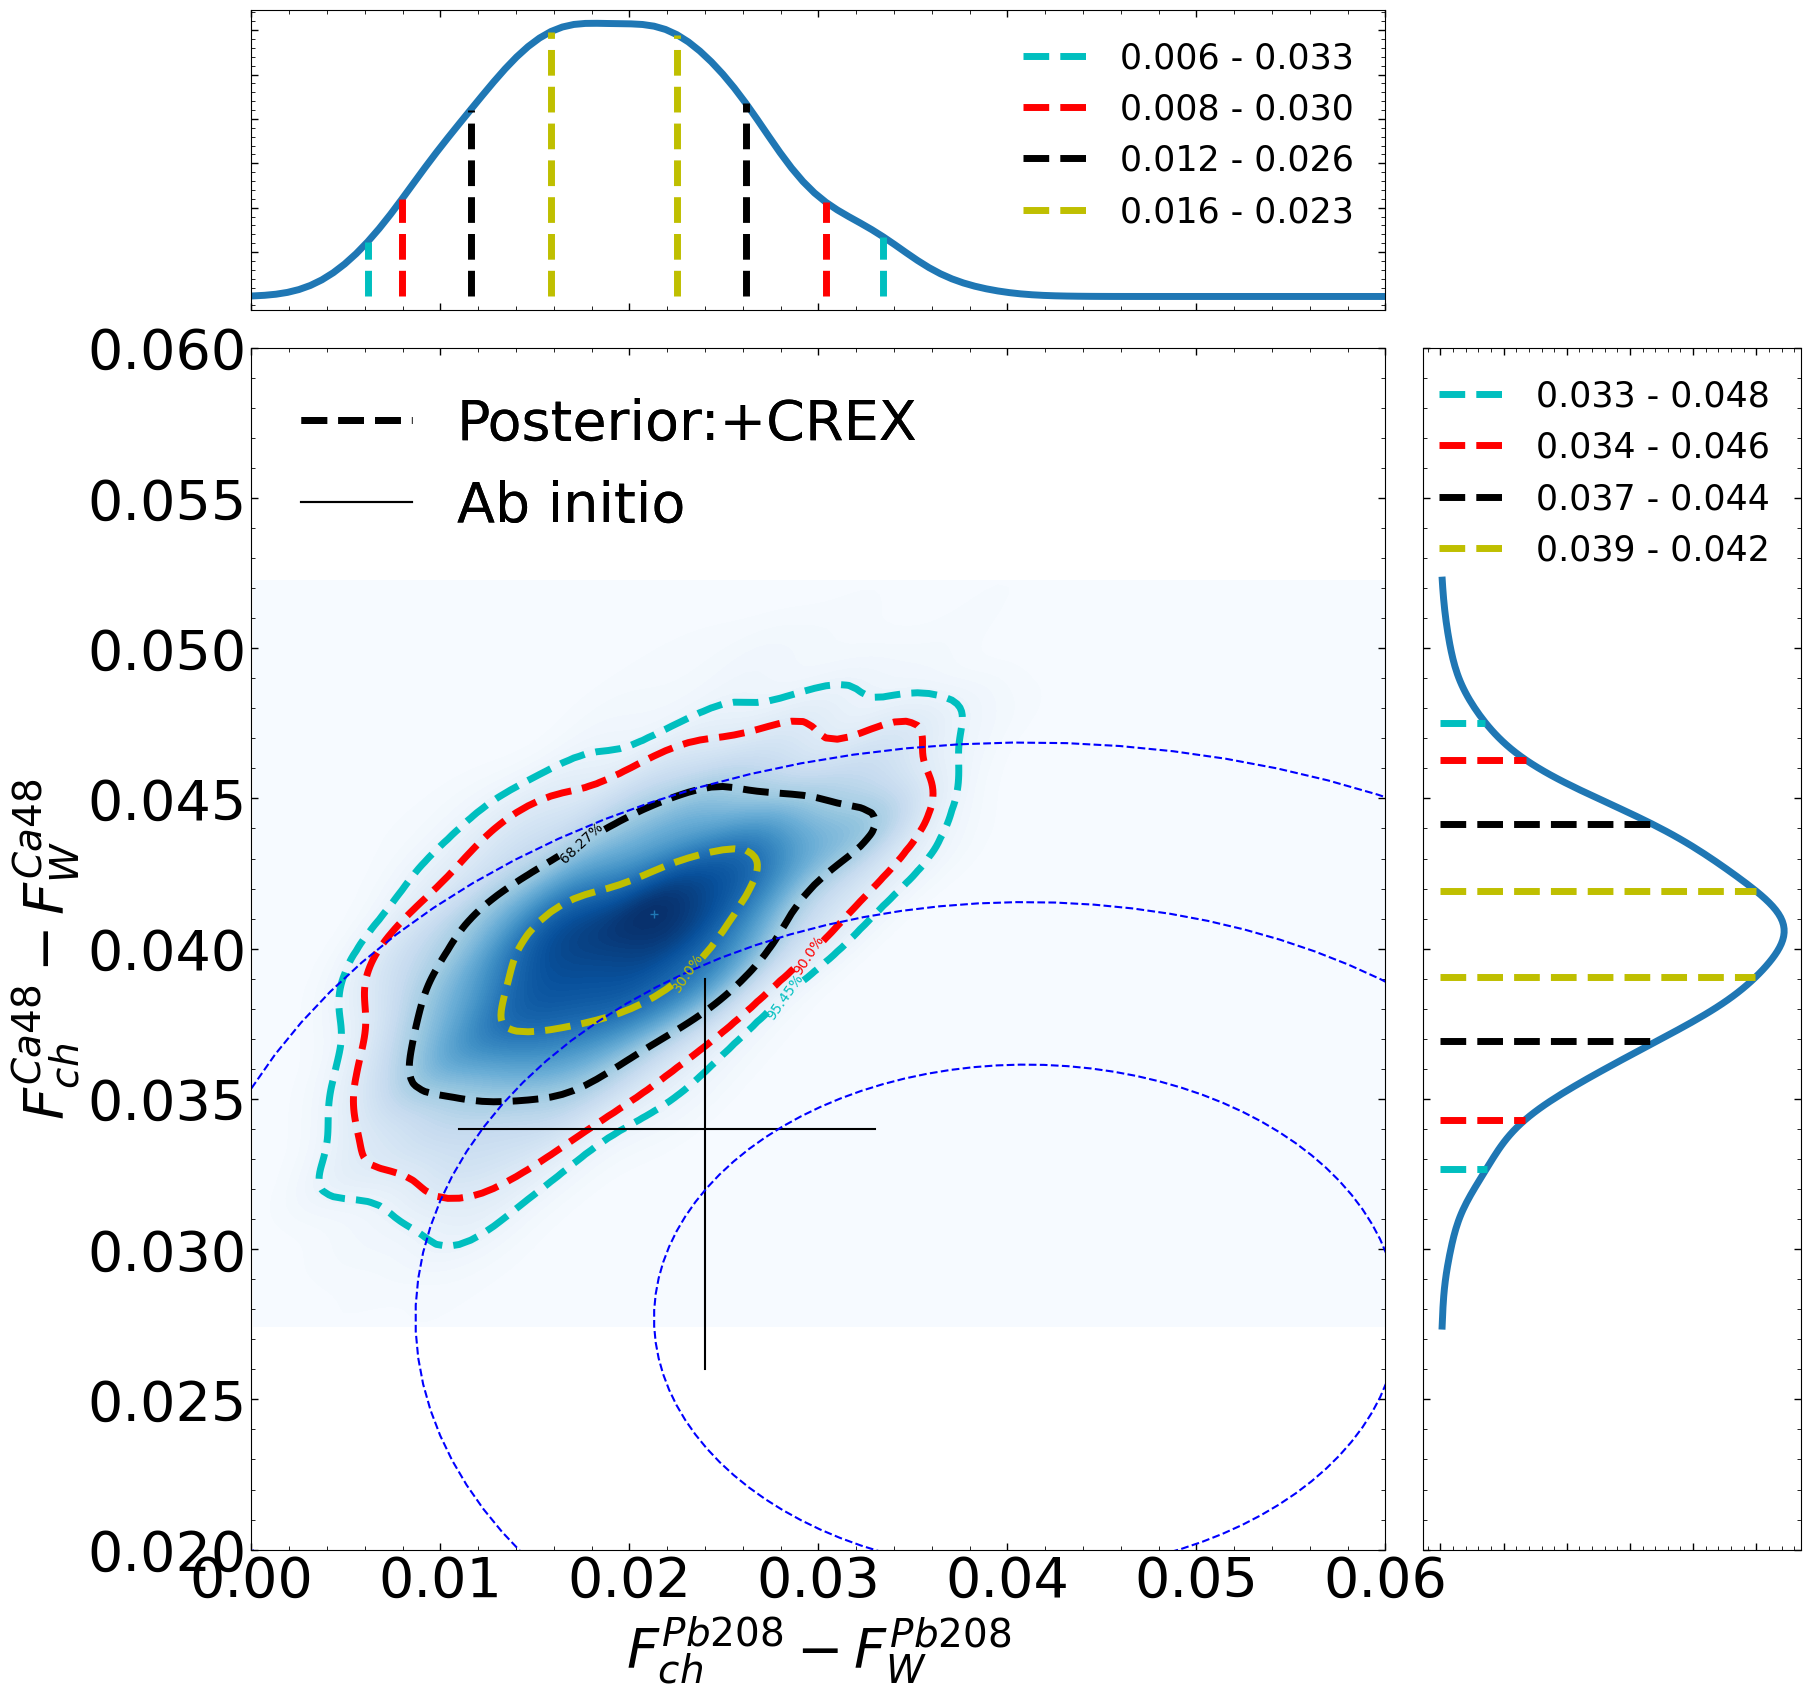

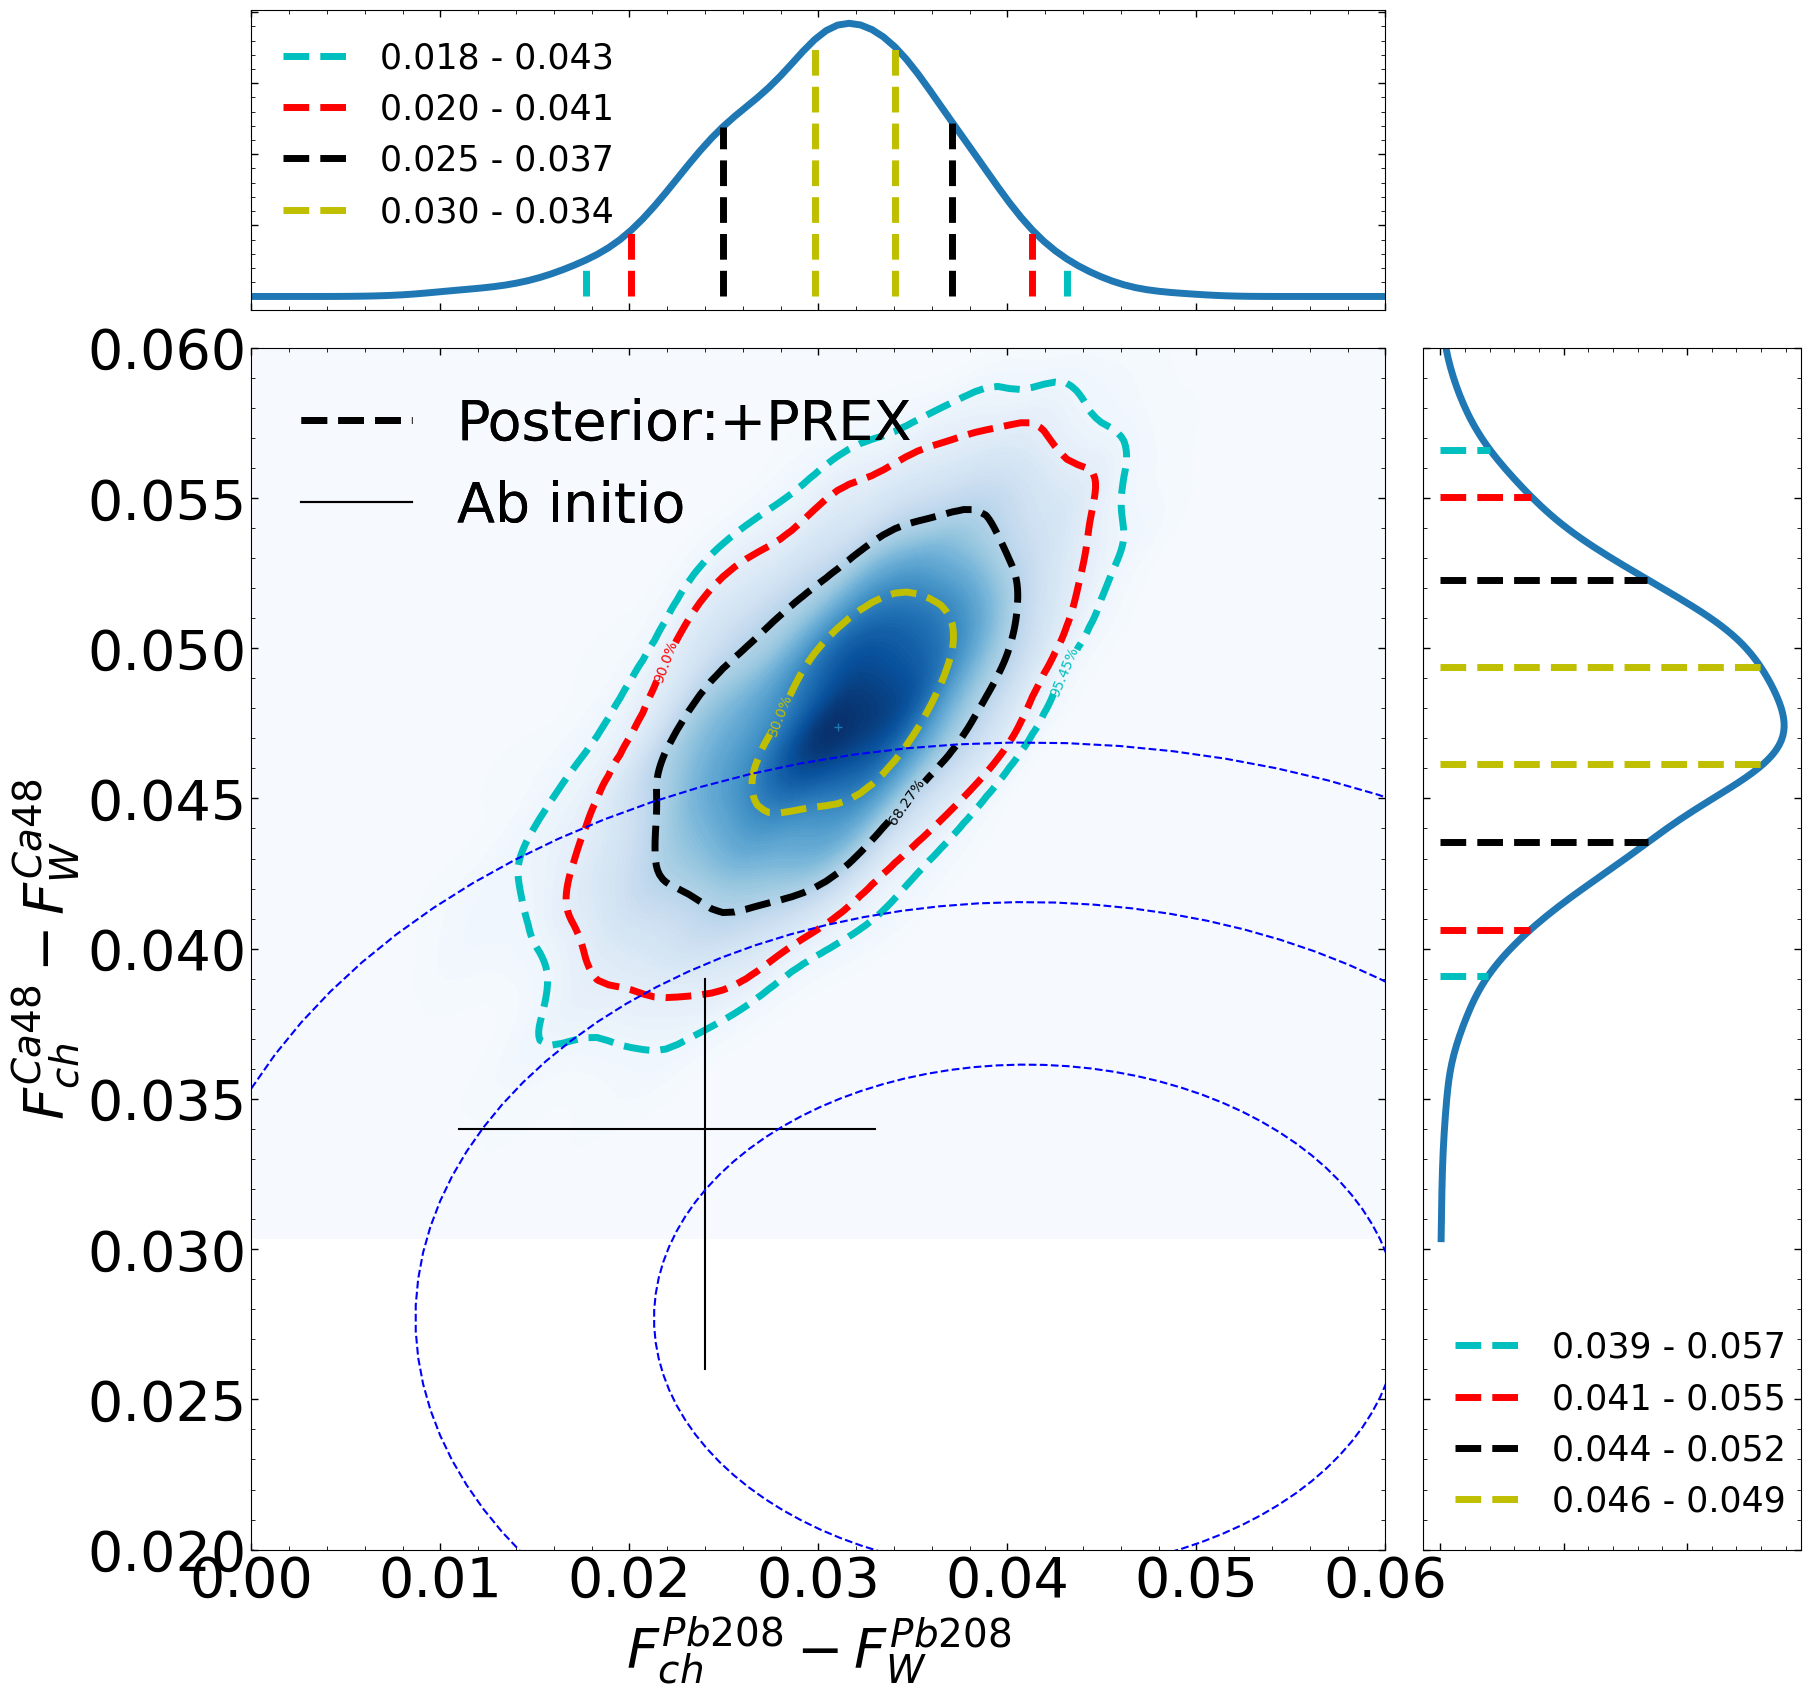

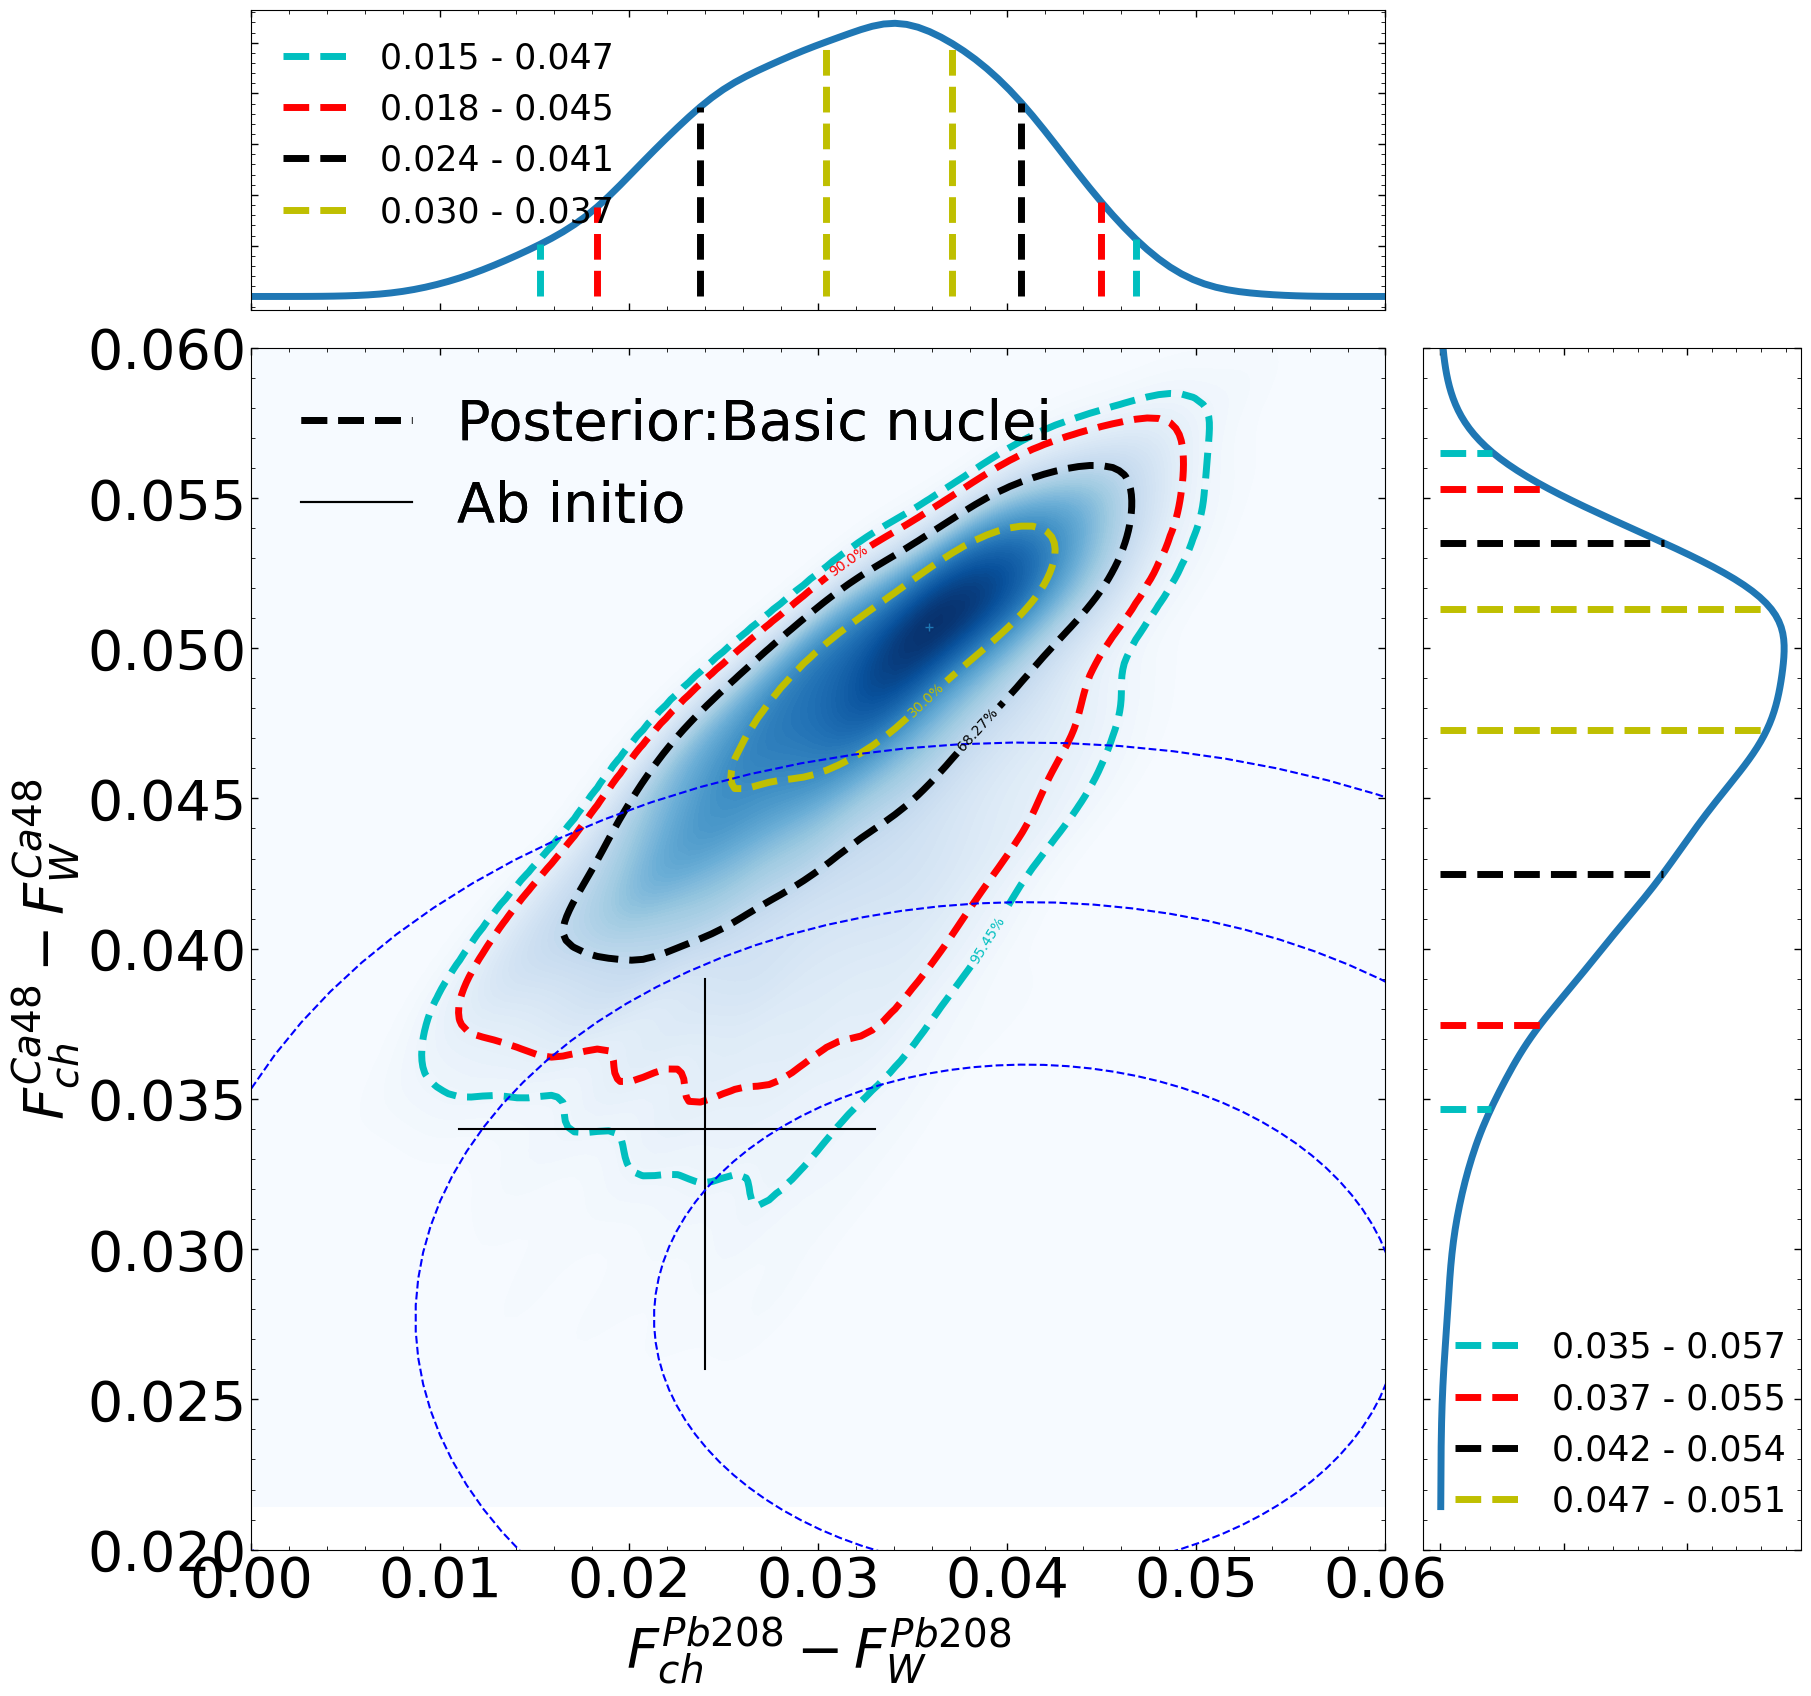

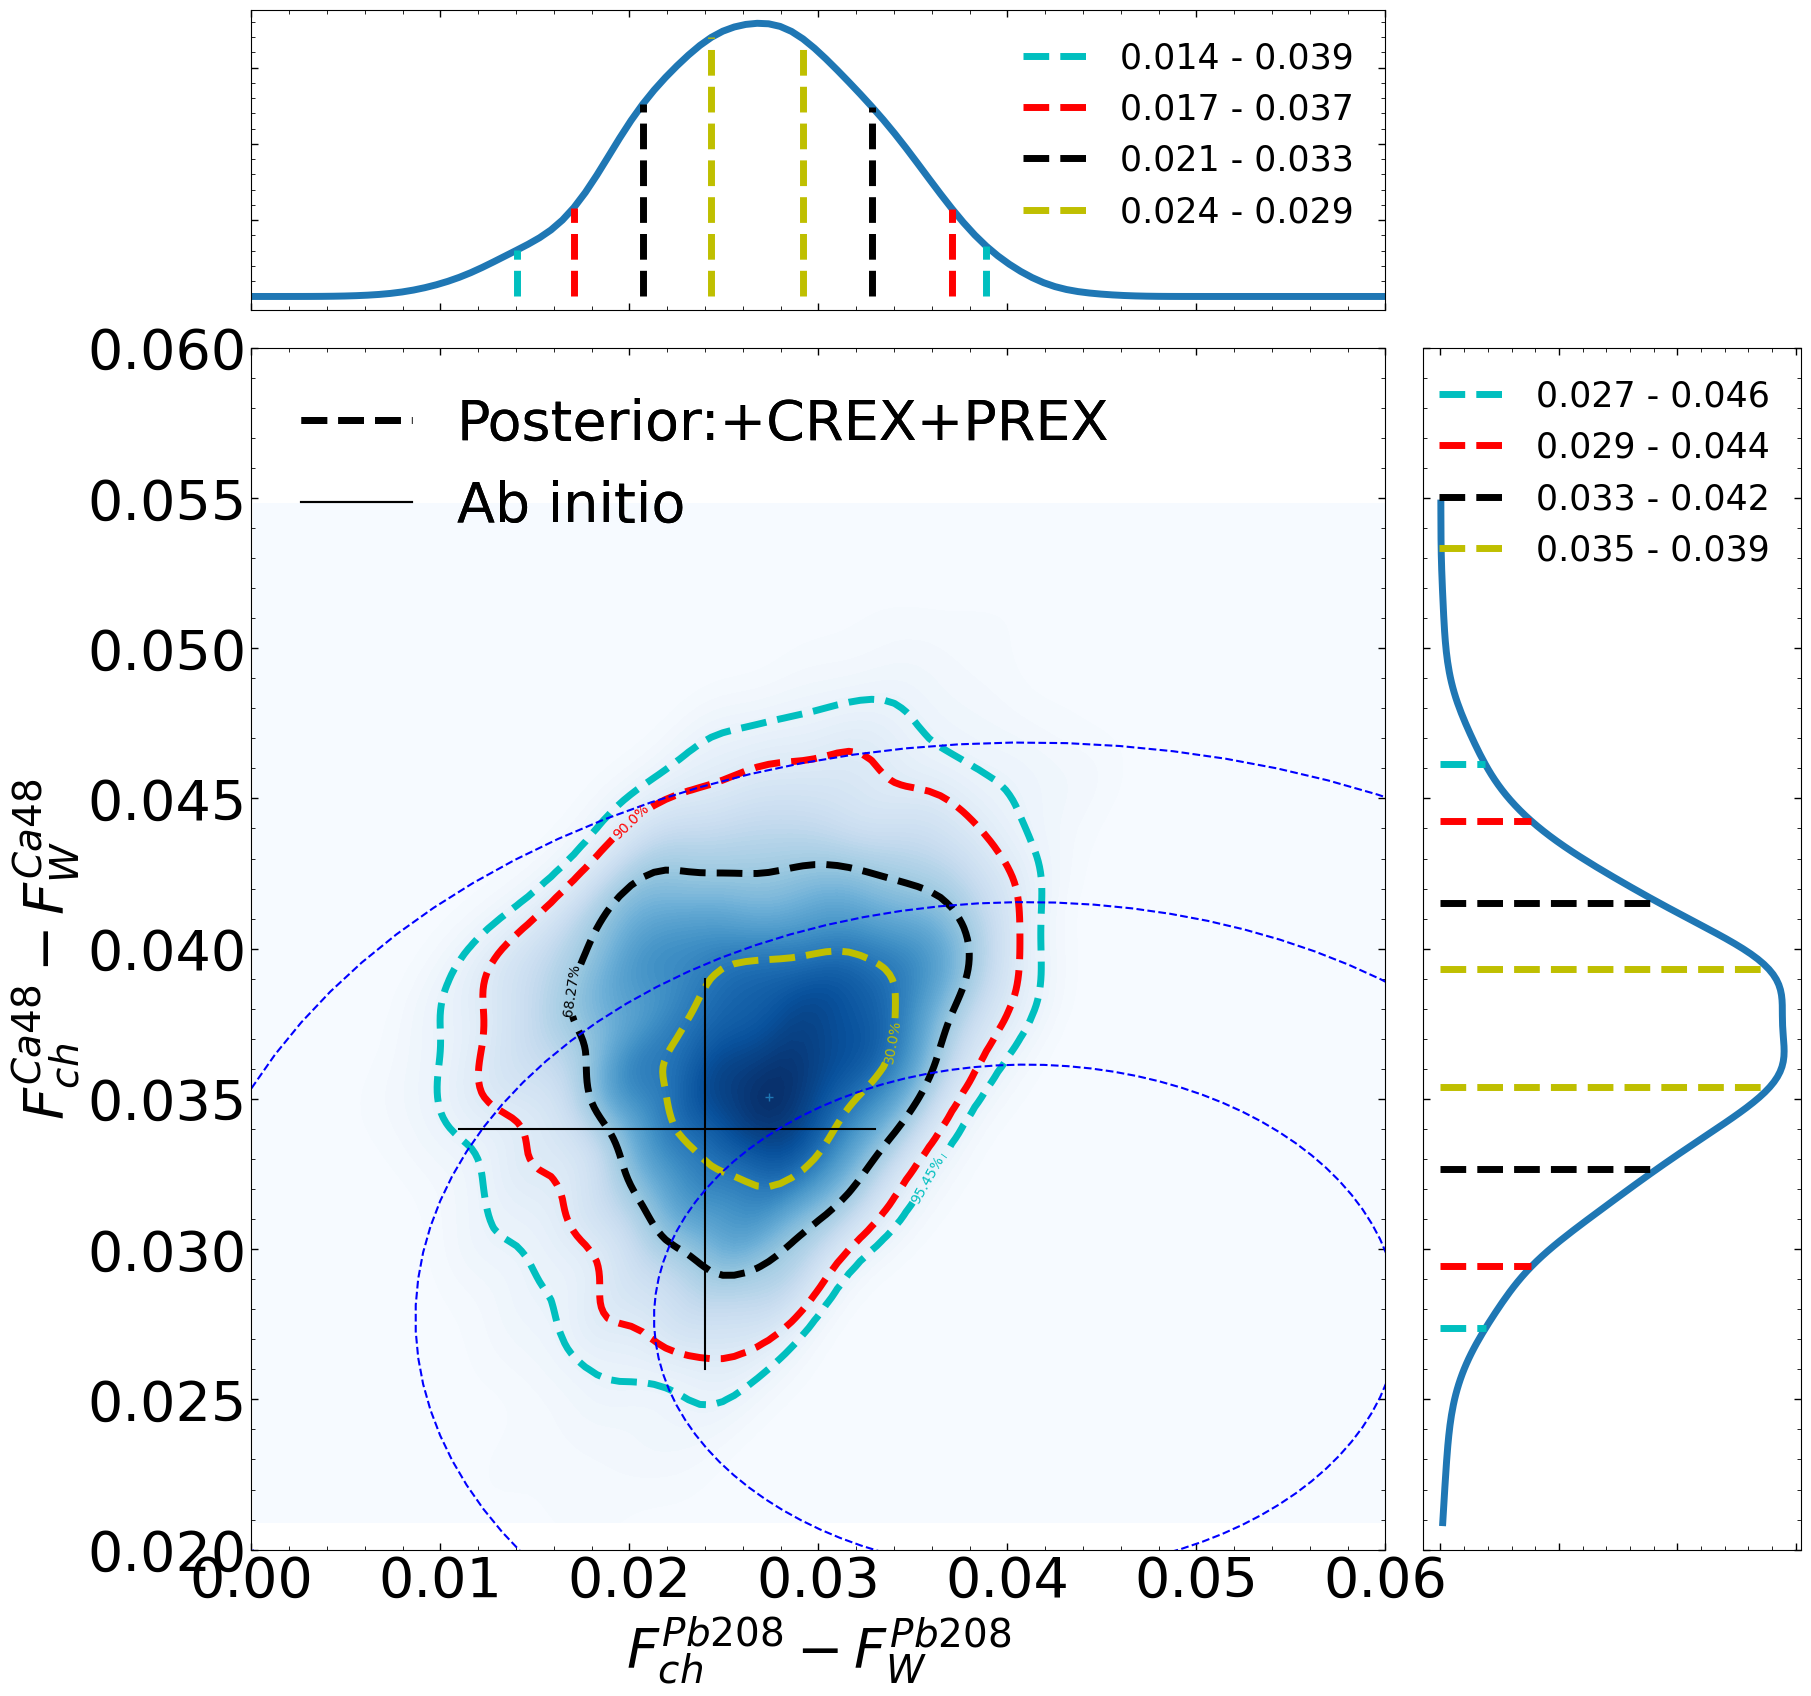

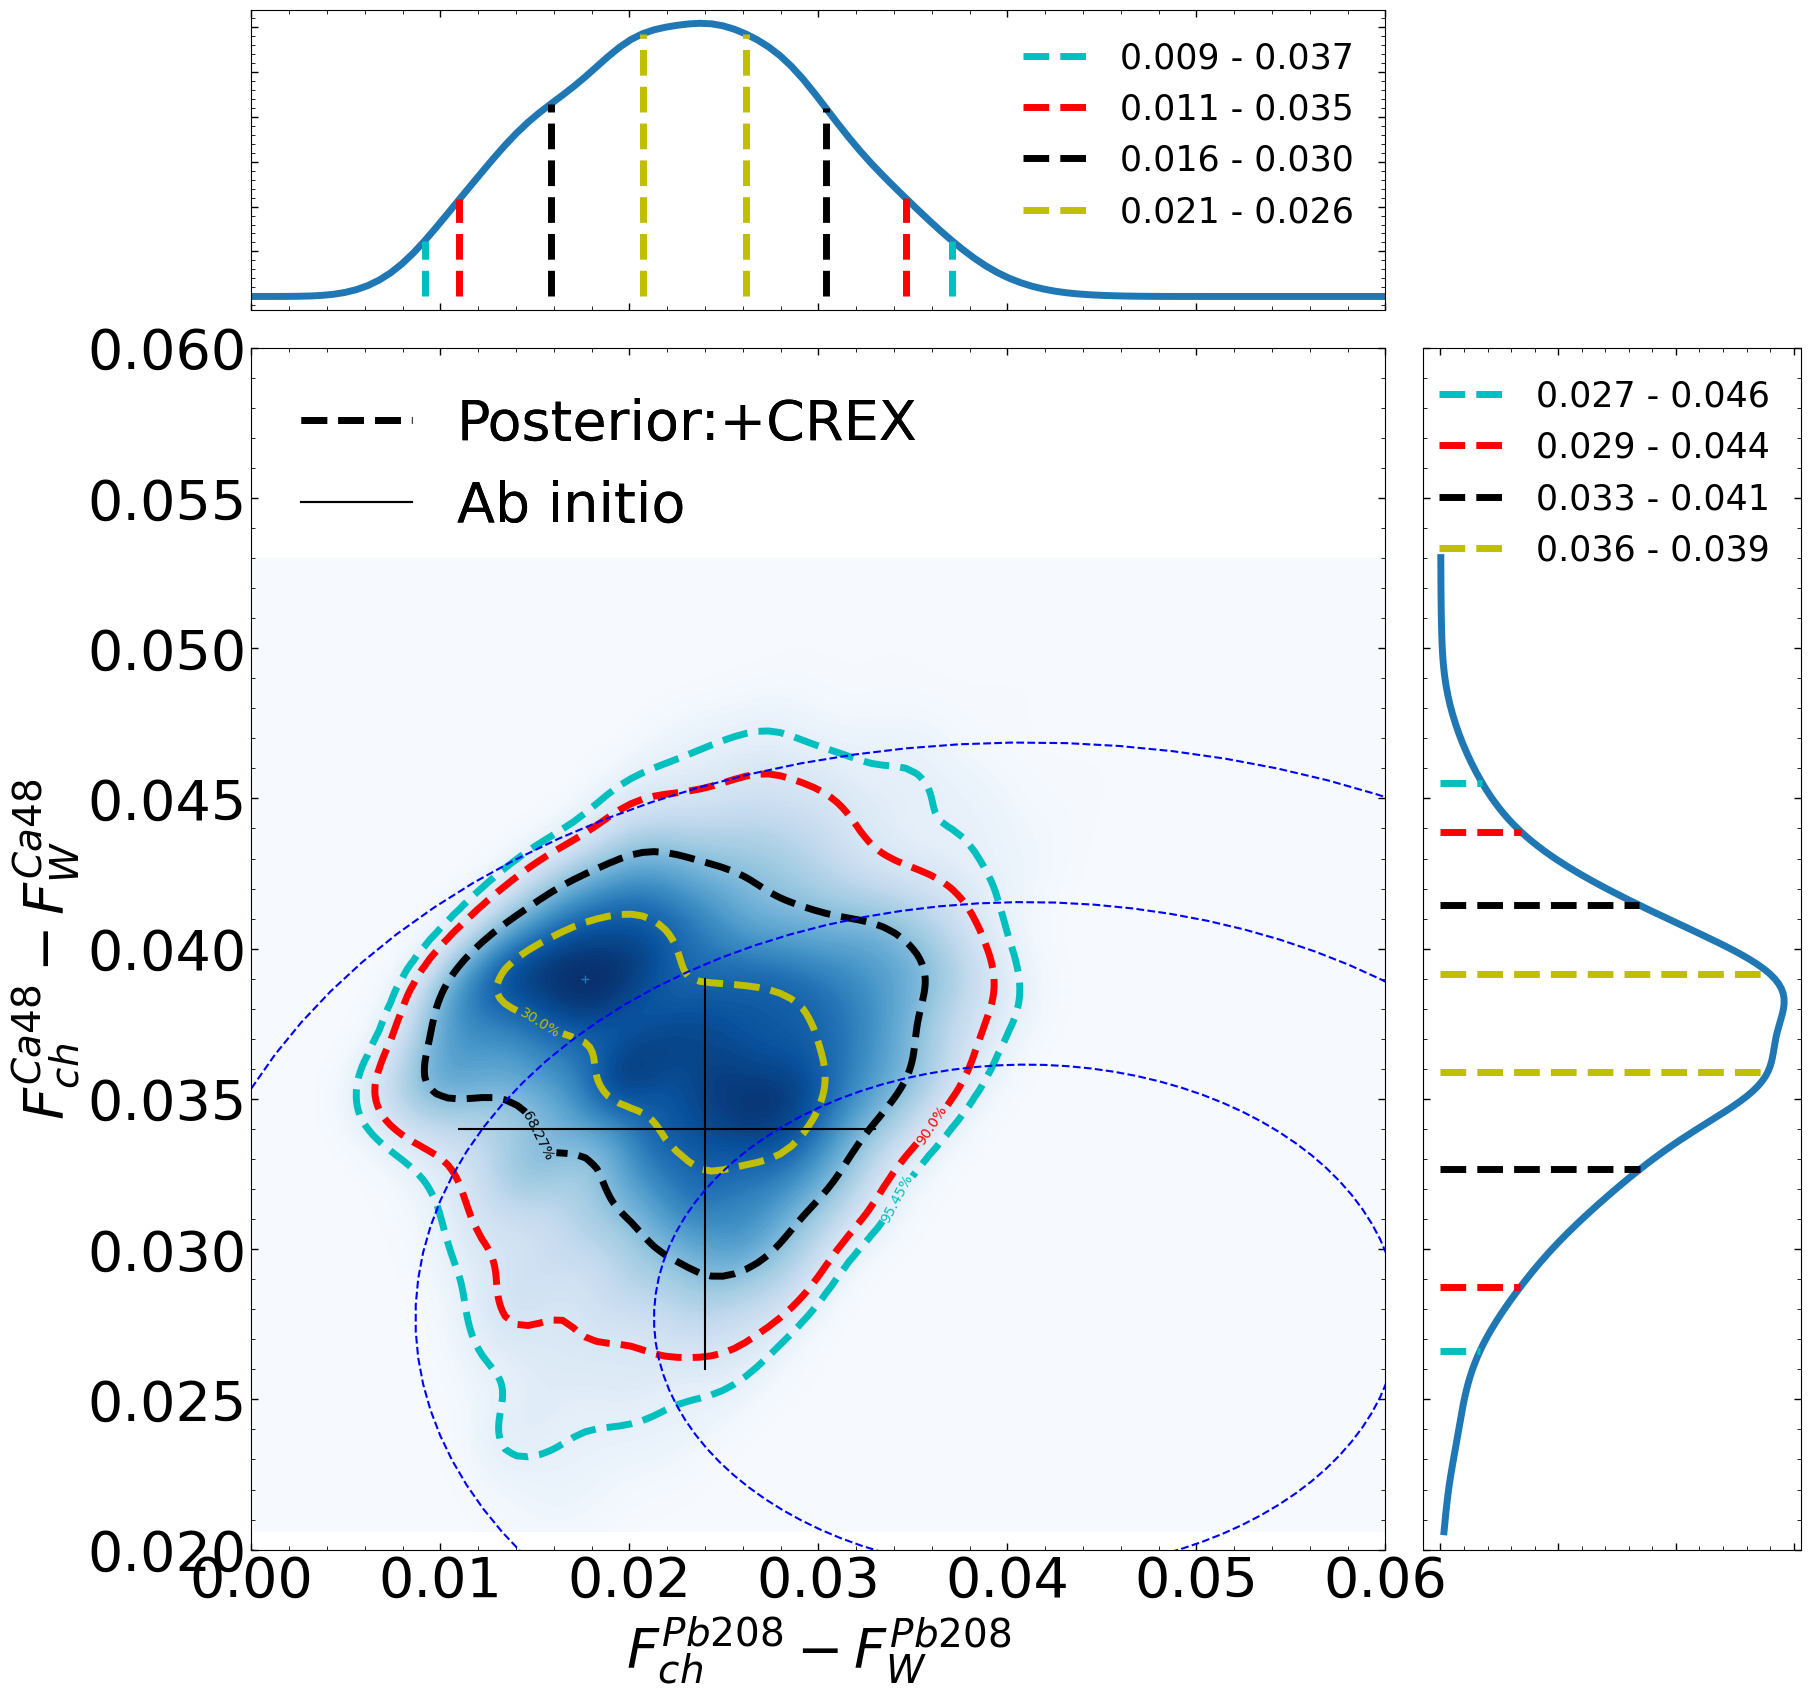

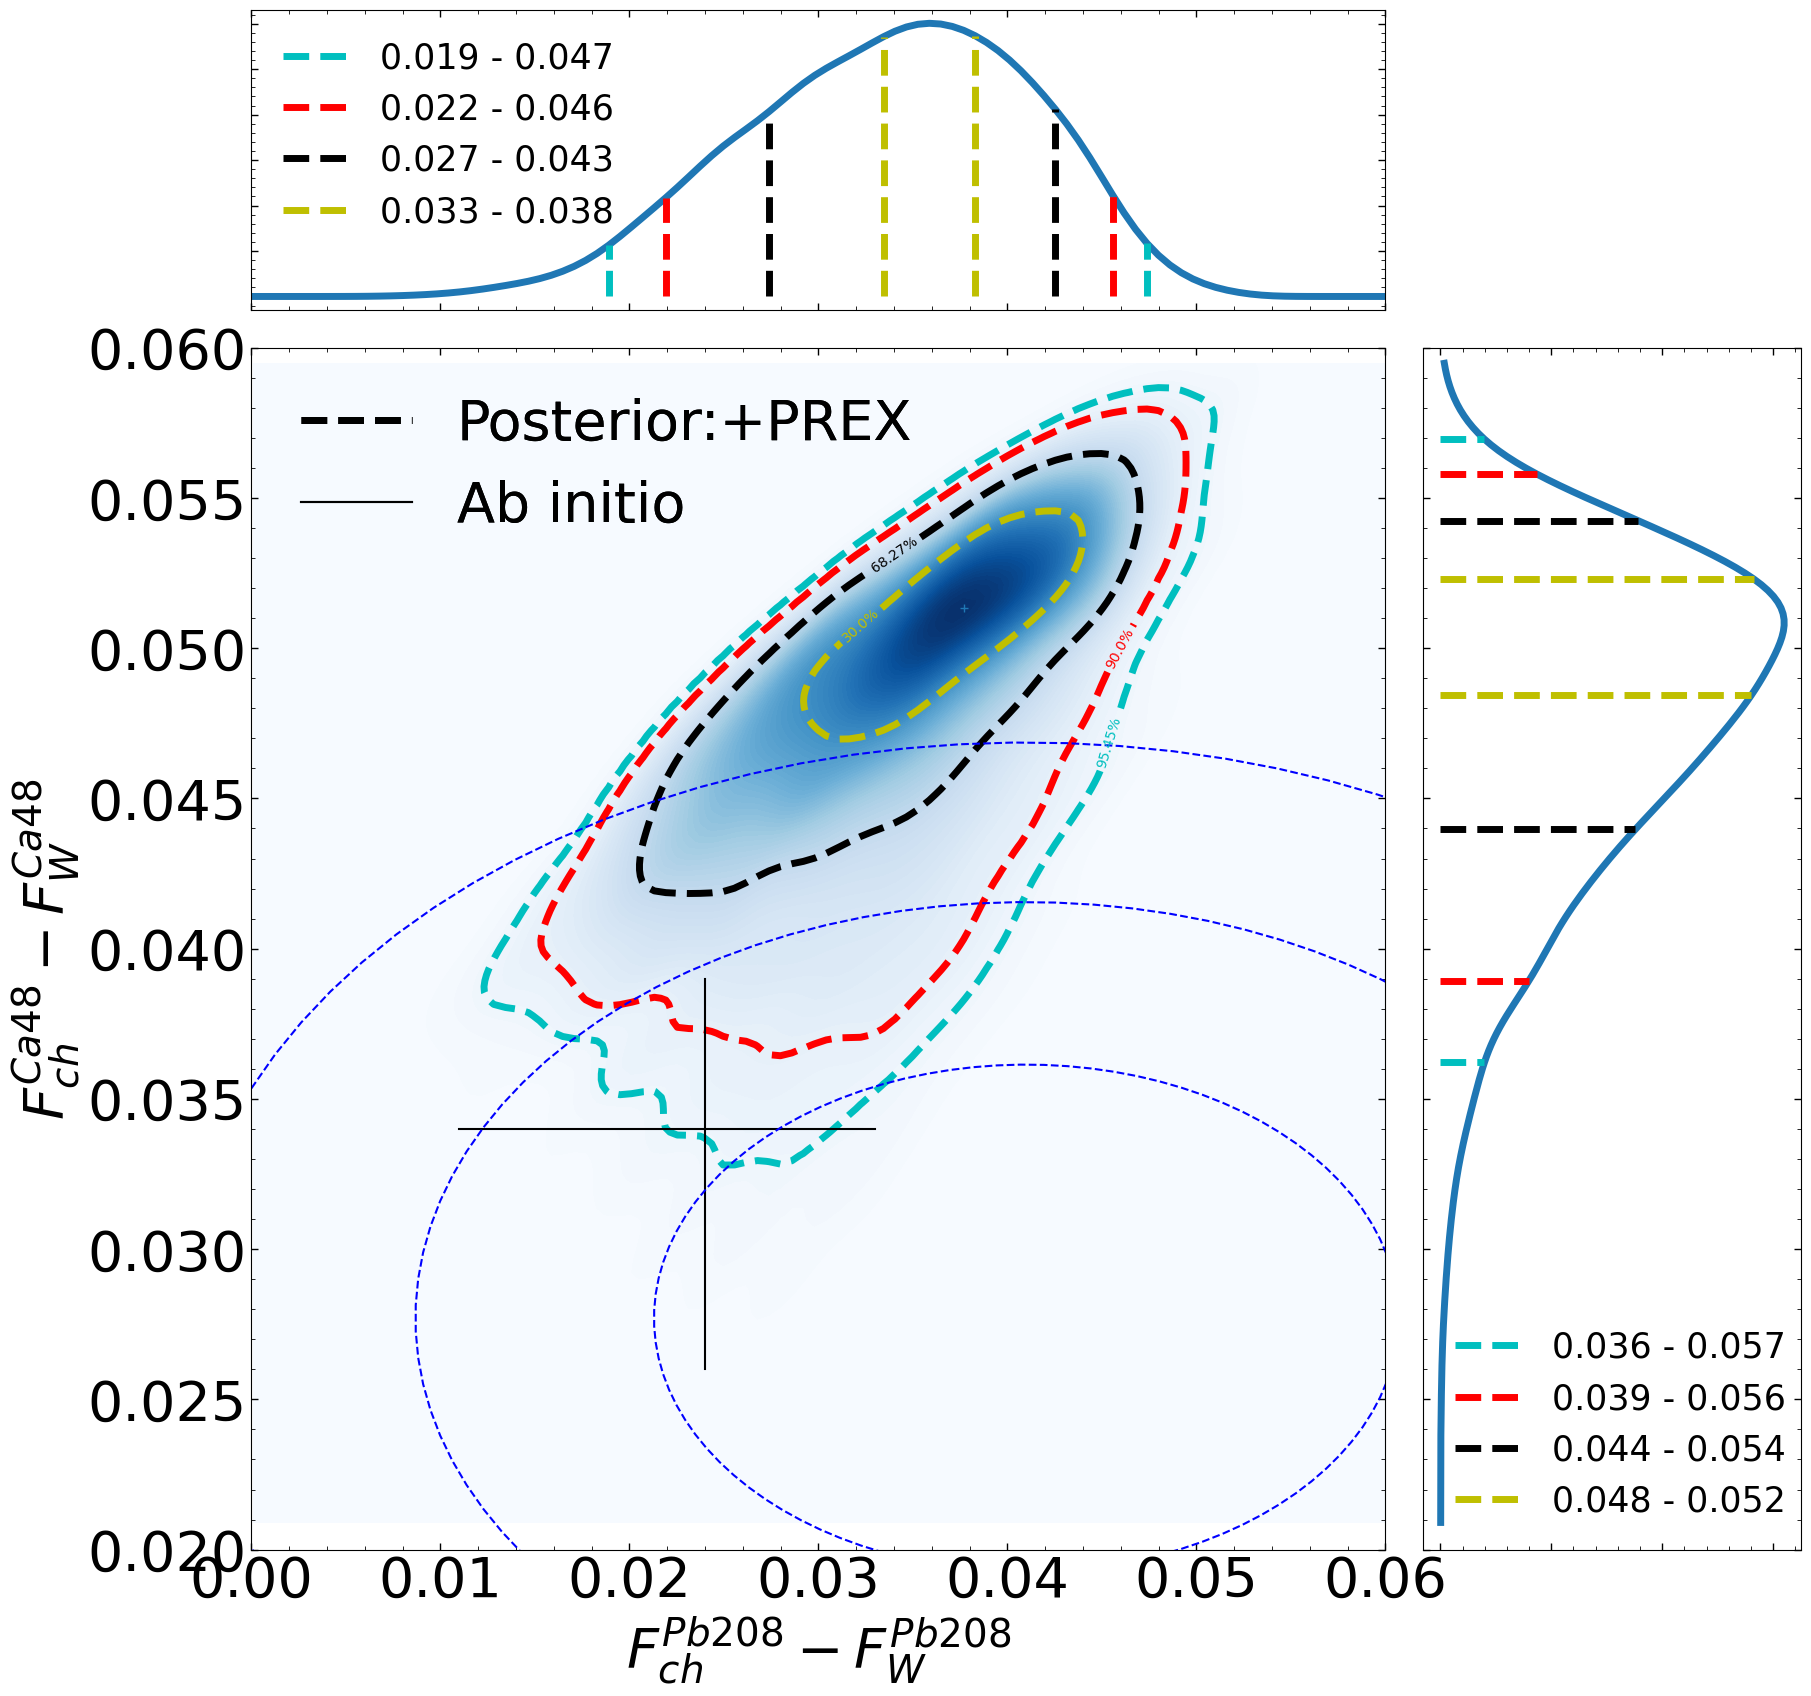

In [8]:
bin_num=[100,200]
#bin_num=[50,100]
percentile_list = [0.9545, 0.9, 0.6827, 0.3]
color_list = ['c','r','k','y','g']

for name,PrexCrex_list in zip(['Skyrme','RMF'],[PrexCrex_Skyrme_list,PrexCrex_RMF_to_Skyrme_list]):
    discrepancy=[]
    for i,PrexCrex_i,likelihood_name_i,likelihood_filename_i in zip(range(4),PrexCrex_list,likelihood_name,likelihood_filename):
        y=PrexCrex_i[0]-PrexCrex_i[2]
        x=PrexCrex_i[1]-PrexCrex_i[3]
        x_grid,y_grid,pdf_grid=get_kde_2D([x,y],bin_num,weights=None,x_min=0,x_max=0.06)

        ax=plot_density_2D(x_grid,y_grid,pdf_grid,percentile_list,color_list,'$F_{ch}^{Pb208}-F_W^{Pb208}$','$F_{ch}^{Ca48}-F_W^{Ca48}$',y_unit='',inline=True)
        ax.legend(fontsize=0)
        ax.set_xlim(0,0.06)
        ax.set_ylim(0.02,0.06)


        line=ax.plot([0.024,0.024],[0.026,0.039],'k')
        line0=ax.plot([0.011,0.033],[0.034,0.034],'k',label='Ab initio')
        #line1=ax.plot(Fc_new[2]-Fw_new[2],Fc_new[0]-Fw_new[0],'om',label='L30 - L130')
        #line2=ax.plot(Fc_rex[2]-Fw_rex[2],Fc_rex[0]-Fw_rex[0],'o',color='brown',label='Sv31 - Sv51')
        #line_skyrme=ax.plot(FchFw_andrew[logic_plot_andrew,1],FchFw_andrew[logic_plot_andrew,0],'og',label='Skyrme')
        line3=ax.plot([0],[0],'--k',lw=5,label='Posterior:'+likelihood_name[i])
        #line4=ax.plot(Fc_lit[2,7:]-Fw_lit[2,7:],Fc_lit[0,7:]-Fw_lit[0,7:],'+k')
        #line5=ax.plot(Fc_lit[2,:7]-Fw_lit[2,:7],Fc_lit[0,:7]-Fw_lit[0,:7],'Xk')
        #for j in range(len(special[0])):
        #    ax.text((Fc_lit[2]-Fw_lit[2])[j]+0.0004,(Fc_lit[0]-Fw_lit[0])[j]-0.0004,special[0][j],fontsize=20)
        theta=np.linspace(0,2*np.pi,100)
        mean_208Pb=Fc_exp[1]-Fw_exp[1]
        mean_48Ca =Fc_exp[0]-Fw_exp[0]
        std_208Pb =np.sqrt(Fw_sig2[1])
        std_48Ca  =np.sqrt(Fw_sig2[0])

        ax.plot(mean_208Pb+scale_chi2[0]*std_208Pb*np.cos(theta),mean_48Ca+scale_chi2[0]*std_48Ca*np.sin(theta),'--b')
        ax.plot(mean_208Pb+scale_chi2[1]*std_208Pb*np.cos(theta),mean_48Ca+scale_chi2[1]*std_48Ca*np.sin(theta),'--b')
        line5=ax.plot(mean_208Pb+scale_chi2[2]*std_208Pb*np.cos(theta),mean_48Ca+scale_chi2[2]*std_48Ca*np.sin(theta),'--b',label='PREX & CREX 68%,80%,95% CR')

        first_legend = ax.legend(handles=line3+line0,fontsize=40,frameon=False, loc='upper left')
        ax.add_artist(first_legend)

        plt.savefig('./figures/FF_posterior_'+likelihood_filename_i+'_'+name+'.pdf',bbox_inches = 'tight',format='pdf')

        det_x_plot=np.linspace(-0.05,0.05,201)
        det_y_plot=np.linspace(-0.05,0.05,201)
        det_pdf_plot=[]
        for x_i in det_x_plot:
            det_pdf_plot.append([])
            for y_i in det_y_plot:
                det_pdf_plot[-1].append(distribution(x_i,y_i,x_grid,y_grid,pdf_grid,normal))
        det_pdf_plot=np.array(det_pdf_plot)

        discrepancy.append(det_pdf_plot[det_pdf_plot>det_pdf_plot[100,100]].sum()/det_pdf_plot.sum())
    discrepancy=np.array(discrepancy)

    discrepancy_sigma=[]
    for discrepancy_i in discrepancy:
        discrepancy_sigma.append(scipy.optimize.root(discrepancy_sig,[1],args=(discrepancy_i,dimension)).x[0])
    discrepancy_sigma=np.array(discrepancy_sigma)
    print('discrepancy:')
    print(discrepancy)
    print(discrepancy_sigma)


In [9]:
N=211
r_fm_max=20
r_grid_fm =np.linspace(0,r_fm_max,N)
r_grid_MeV=r_grid_fm*unitconvert.unitMeVfm**(1/3)
omega_over_m=0.022
M=939

def load_basis(path,dir_name):
    kappa_list=np.loadtxt(path+dir_name+'/init.txt')
    x=np.loadtxt(path+dir_name+'/x_grid.txt')
    E_over_m_list=np.loadtxt(path+dir_name+'/E_over_m.txt')
    g_basis_list=[]
    f_basis_list=[]
    g_times_r_basis_list=[]
    f_times_r_basis_list=[]
    g_basis_norm_list=[]
    f_basis_norm_list=[]
    g_times_r_basis_norm_list=[]
    f_times_r_basis_norm_list=[]
    Matrix_fg=[]
    for i,kappa in enumerate(kappa_list):
        dir_kappa=dir_name+'/kappa_%d'%kappa
        path_dir_kappa=path+dir_kappa
        g_basis_list.append(np.loadtxt(path_dir_kappa+'/g_basis_norm0.txt'))
        f_basis_list.append(np.loadtxt(path_dir_kappa+'/f_basis_norm0.txt'))
        g_times_r_basis_list.append(np.loadtxt(path_dir_kappa+'/g_basis_norm1.txt'))
        f_times_r_basis_list.append(np.loadtxt(path_dir_kappa+'/f_basis_norm1.txt'))
        g_basis_norm_list.append(np.loadtxt(path_dir_kappa+'/g_basis_norm2.txt'))
        f_basis_norm_list.append(np.loadtxt(path_dir_kappa+'/f_basis_norm2.txt'))
        g_times_r_basis_norm_list.append(np.loadtxt(path_dir_kappa+'/g_basis_norm3.txt'))
        f_times_r_basis_norm_list.append(np.loadtxt(path_dir_kappa+'/f_basis_norm3.txt'))
        Matrix_fg.append(np.loadtxt(path_dir_kappa+'/Matrix_fg.txt'))
    g_basis_list=np.array(g_basis_list)
    f_basis_list=np.array(f_basis_list)
    g_times_r_basis_list=np.array(g_times_r_basis_list)
    f_times_r_basis_list=np.array(f_times_r_basis_list)
    g_basis_norm_list=np.array(g_basis_norm_list)
    f_basis_norm_list=np.array(f_basis_norm_list)
    g_times_r_basis_norm_list=np.array(g_times_r_basis_norm_list)
    f_times_r_basis_norm_list=np.array(f_times_r_basis_norm_list)
    Matrix_fg=np.array(Matrix_fg)
    return [kappa_list,E_over_m_list,g_basis_list,f_basis_list,g_times_r_basis_list,f_times_r_basis_list, g_basis_norm_list,f_basis_norm_list,g_times_r_basis_norm_list,f_times_r_basis_norm_list,Matrix_fg]

kappa_list,E_over_m_list,g_basis_list,f_basis_list,g_times_r_basis_list,f_times_r_basis_list, g_basis_norm_list,f_basis_norm_list,g_times_r_basis_norm_list,f_times_r_basis_norm_list,Matrix_fg=load_basis('./data/','basis')
kappa_list=list(kappa_list)
level_list=[[22,16],[11,10],[7,6]]
q_list=[0.3977,1,0.8733] #Form factor at momentum q in fm-1, q for 90Zr is dummy.
density_unit=omega_over_m*M**2/(4*np.pi*(r_grid_MeV[1]-r_grid_MeV[0]))

def vector_to_result(kappa_all,vector_all,kappa_list,basis_norm_list):
    return np.array([vector_all[:,i].dot(basis_norm_list[kappa_list.index(kappa_i)]) for i,kappa_i in enumerate(kappa_all)])

def density(kappaEgf,level_list,return_levels=False):
    N_basis=int(len(kappaEgf)/2-1)
    kappa_all=kappaEgf[0]
    densities=[]
    densities_levels=[]
    level_sum=0
    for to_level_np in level_list:
        densities_levels.append([])
        for to_level in to_level_np:
            g_vector_all=kappaEgf[2:(2+N_basis),level_sum:(level_sum+to_level)]
            f_vector_all=kappaEgf[(2+N_basis):,level_sum:(level_sum+to_level)]
            #print(kappa_all[level_sum:(level_sum+to_level)],kappa_all[level_sum:(level_sum+to_level)].shape,g_vector_all.shape)
            g_result_all=vector_to_result(kappa_all[level_sum:(level_sum+to_level)],g_vector_all,kappa_list,g_basis_norm_list)
            f_result_all=vector_to_result(kappa_all[level_sum:(level_sum+to_level)],f_vector_all,kappa_list,f_basis_norm_list)
            g2_result_all=g_result_all**2
            f2_result_all=f_result_all**2
            svt_result_all=np.array([g2_result_all-f2_result_all,g2_result_all+f2_result_all,2*g_result_all*f_result_all])
            densities_levels[-1].append(density_unit*svt_result_all*np.abs(2*kappa_all[level_sum:(level_sum+to_level)])[np.newaxis,:,np.newaxis])
            densities.append(densities_levels[-1][-1].sum(axis=1))
            level_sum+=to_level
    if(return_levels):
        return np.array(densities).reshape((3,2,3,N)),densities_levels
    else:
        return np.array(densities).reshape((3,2,3,N))

# toolbox.pickle_dump('./','data',([kappaEgf_RMF_to_Skyrme_list[0][:,:,:5000],'kappaEgf_RMF_to_Skyrme_none1'],))
# toolbox.pickle_dump('./','data',([kappaEgf_RMF_to_Skyrme_list[0][:,:,5000:],'kappaEgf_RMF_to_Skyrme_none2'],))
# toolbox.pickle_dump('./','data',([kappaEgf_RMF_to_Skyrme_list[1],'kappaEgf_RMF_to_Skyrme_all'],))
# toolbox.pickle_dump('./','data',([kappaEgf_RMF_to_Skyrme_list[2],'kappaEgf_RMF_to_Skyrme_crex'],))
# toolbox.pickle_dump('./','data',([kappaEgf_RMF_to_Skyrme_list[3][:,:,:5000],'kappaEgf_RMF_to_Skyrme_prex1'],))
# toolbox.pickle_dump('./','data',([kappaEgf_RMF_to_Skyrme_list[3][:,:,5000:10000],'kappaEgf_RMF_to_Skyrme_prex2'],))
# toolbox.pickle_dump('./','data',([kappaEgf_RMF_to_Skyrme_list[3][:,:,10000:],'kappaEgf_RMF_to_Skyrme_prex3'],))


#kappaEgf_RMF_to_Skyrme_list=toolbox.pickle_load('./','data',['kappaEgf_RMF_to_Skyrme_list'])[0]
kappaEgf_RMF_to_Skyrme_list=[]
kappaEgf_RMF_to_Skyrme_list+=[np.concatenate(toolbox.pickle_load('./','data',['kappaEgf_RMF_to_Skyrme_none1','kappaEgf_RMF_to_Skyrme_none2']),axis=2)]
kappaEgf_RMF_to_Skyrme_list+=toolbox.pickle_load('./','data',['kappaEgf_RMF_to_Skyrme_all','kappaEgf_RMF_to_Skyrme_crex'])
kappaEgf_RMF_to_Skyrme_list+=[np.concatenate(toolbox.pickle_load('./','data',['kappaEgf_RMF_to_Skyrme_PREX1','kappaEgf_RMF_to_Skyrme_PREX2','kappaEgf_RMF_to_Skyrme_PREX3']),axis=2)]
densities_fm3_RMF_to_Skyrme_list=[unitconvert.toMevfm(np.array([density(kappaEgf_i,level_list) for kappaEgf_i in kappaEgf.transpose((2,0,1))]),'mev4') for kappaEgf in kappaEgf_RMF_to_Skyrme_list]

In [10]:
percentile_array=np.array([16,50,84])
density_percentile=[]
#for densities_fm3_i in densities_fm3_RMF_list:
for densities_fm3_i in densities_fm3_RMF_to_Skyrme_list:
    density_percentile.append(np.percentile(densities_fm3_i,percentile_array,axis=0))
density_percentile=np.array(density_percentile)

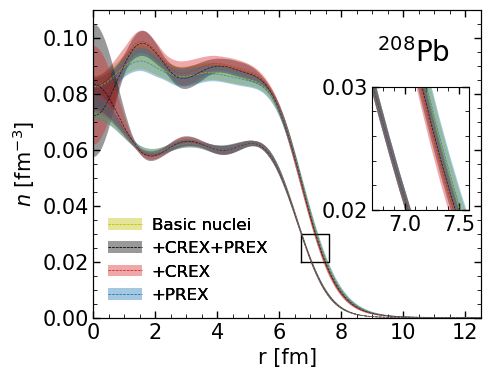

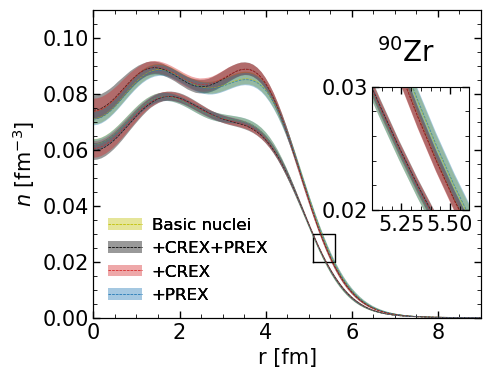

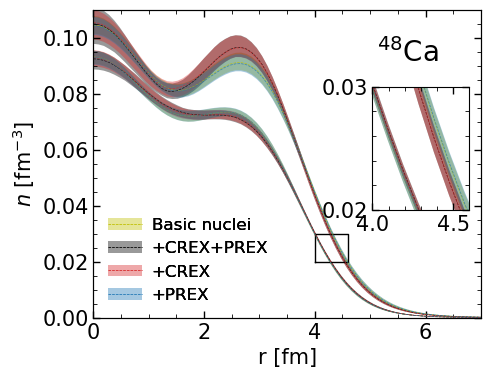

In [11]:
density_percentile_to_plot=density_percentile
name='RMF'

lw=0.5
ls='--'
alpha=0.4

color_list = ['y','k','tab:red','tab:blue']
for nuclei_index,nuclei_name,file_name,xlim,xlim_small in zip([0,1,2],['$^{208}$Pb','$^{90}$Zr','$^{48}$Ca'],['pb208','zr490','ca48'],[12.5,9,7],[[6.7,7.6],[5.1,5.6],[4,4.6]]):
    fig,ax=plt.subplots(1,1,figsize=(5,4),sharex=False,sharey=False)
    ax.set_xticks(range(0,(int(xlim/2)+1)*2,2))
    ax_twin=ax.twinx()
    nucleon_index=0
    band_list=[]
    line_list=[]
    for i in range(4):
        band_list.append(ax.fill_between(r_grid_fm,density_percentile_to_plot[i,0,nuclei_index,nucleon_index,1],density_percentile_to_plot[i,2,nuclei_index,nucleon_index,1],alpha=alpha,label=likelihood_name[i],color=color_list[i],linewidth=0))
        line_list+=ax_twin.plot(r_grid_fm,density_percentile_to_plot[i,1,nuclei_index,nucleon_index,1],label=likelihood_name[i],color=color_list[i],lw=lw,ls=ls,alpha=0.8)
    nucleon_index=1
    for i in range(4):
        ax.fill_between(r_grid_fm,density_percentile_to_plot[i,0,nuclei_index,nucleon_index,1],density_percentile_to_plot[i,2,nuclei_index,nucleon_index,1],alpha=alpha,label=likelihood_name[i],color=color_list[i],linewidth=0)
        ax_twin.plot(r_grid_fm,density_percentile_to_plot[i,1,nuclei_index,nucleon_index,1],label=likelihood_name[i],color=color_list[i],lw=lw,ls=ls,alpha=0.8)

    first_legend = ax.legend(handles=band_list,fontsize=12,frameon=False,handletextpad=0.6,ncol=1,columnspacing=-0.8, loc='lower left', bbox_to_anchor=(0, 0))
    ax.add_artist(first_legend)
    ax.set_xlim(0,xlim)
    ax.set_ylim(0,0.11) 
    ax.set_xlabel('r [fm]',fontsize=15)
    ax.set_ylabel('$n$ [fm$^{-3}$]',fontsize=15)

    first_legend = ax_twin.legend(handles=line_list,fontsize=12,frameon=False,handletextpad=0.6,ncol=1,columnspacing=-0.8, loc='lower left', bbox_to_anchor=(0, 0))
    ax_twin.add_artist(first_legend)
    ax_twin.set_xlim(0,xlim)
    ax_twin.set_ylim(0,0.11) 
    ax_twin.set_yticklabels('')
    
    ax.plot(np.concatenate((xlim_small,xlim_small[::-1],[xlim_small[0]])),[0.02,0.02,0.03,0.03,0.02],'k',lw=1)
    ax_small=ax.inset_axes([0.72,0.35,0.25,0.4])
    for nucleon_index in [0,1]:
        for i in range(4):
            ax_small.fill_between(r_grid_fm,density_percentile_to_plot[i,0,nuclei_index,nucleon_index,1],density_percentile_to_plot[i,2,nuclei_index,nucleon_index,1],alpha=alpha,color=color_list[i],linewidth=0)
            ax_small.plot(r_grid_fm,density_percentile_to_plot[i,1,nuclei_index,nucleon_index,1],color=color_list[i],lw=lw,ls=ls,alpha=0.8)
    ax_small.set_xlim(xlim_small[0],xlim_small[1])
    ax_small.set_ylim(0.02,0.03)
    ax_small.set_yticks([0.02,0.03])

    second_legend = ax.legend(title=nuclei_name,handles=[],title_fontsize=20,frameon=False,handletextpad=0.3, loc='lower left', bbox_to_anchor=(0.7, 0.75))
    #ax.add_artist(second_legend)
    
    plt.savefig('./figures/profile_'+file_name+'_'+name+'.pdf',bbox_inches = 'tight',format='pdf')



In [12]:
percentile_array=np.array([16,50,84])
b4_grid=np.array([-np.infty,0.1,0.3,0.5,0.7,np.infty])
b4_grid_name=['0.0','0.1','0.3','0.5','0.7','1']

#b4p=(eos_args_RMF[4]/763**2+eos_args_RMF[2]/980**2)/(8*939**2)*197.3**4
#densities_fm3_RMF=np.concatenate(densities_fm3_RMF_list)
b4p=(eos_args_RMF_to_Skyrme[4]/763**2+eos_args_RMF_to_Skyrme[2]/980**2)/(8*939**2)*197.3**4
densities_fm3_RMF=np.concatenate(densities_fm3_RMF_to_Skyrme_list)

density_percentile_b4p=[]
for i in range(len(b4_grid)-1):
    logic_i=np.logical_and(b4p>b4_grid[i],b4p<b4_grid[i+1])
    densities_fm3_i=densities_fm3_RMF[logic_i]
    density_percentile_b4p.append(np.percentile(densities_fm3_i,percentile_array,axis=0))
    print(len(densities_fm3_i),np.diff(PrexCrex_RMF_to_Skyrme[[11,10]][:,logic_i].mean(axis=1)),np.diff(PrexCrex_RMF_to_Skyrme[[3,1]][:,logic_i].mean(axis=1)))
    print(np.diff(PrexCrex_RMF_to_Skyrme[[13,12]][:,logic_i].mean(axis=1)),np.diff(PrexCrex_RMF_to_Skyrme[[2,0]][:,logic_i].mean(axis=1)))
density_percentile_b4p=np.array(density_percentile_b4p)


8177 [0.21528704] [0.03138166]
[0.20179449] [0.04928604]
10325 [0.20266091] [0.02962093]
[0.18067771] [0.04601113]
7101 [0.19738922] [0.02929961]
[0.14686463] [0.04128215]
5272 [0.21358778] [0.03198978]
[0.12272937] [0.03756205]
556 [0.25659021] [0.03809455]
[0.13373278] [0.03832359]


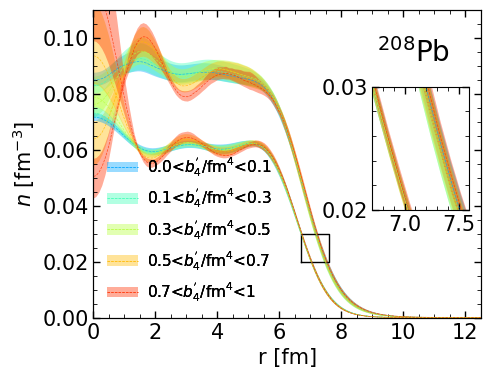

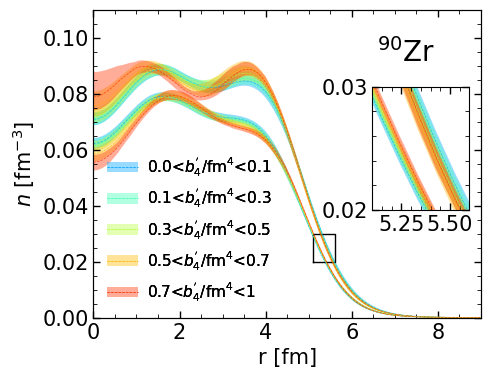

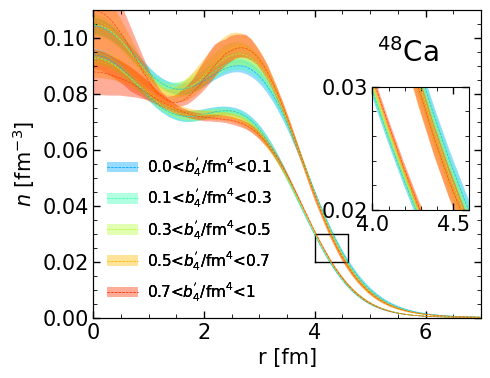

In [13]:
density_percentile_to_plot=density_percentile_b4p
label_nambe_to_plot=[b4_grid_name[i]+'<$b^{\'}_4$/fm$^4$<'+b4_grid_name[i+1] for i in range(len(b4_grid_name)-1)]
lw=0.5
ls='--'
alpha=0.4
color_list=np.array([[0.        , 0.64509804, 1.        , 1.        ],
       [0.24984187, 1.        , 0.71790006, 1.        ],
       [0.71790006, 1.        , 0.24984187, 1.        ],
       [1.        , 0.72694263, 0.        , 1.        ],
       [1.        , 0.18954248, 0.        , 1.        ]])

#color_list = ['y','k','tab:red','tab:blue']
for nuclei_index,nuclei_name,file_name,xlim,xlim_small in zip([0,1,2],['$^{208}$Pb','$^{90}$Zr','$^{48}$Ca'],['pb208','zr490','ca48'],[12.5,9,7],[[6.7,7.6],[5.1,5.6],[4,4.6]]):
    fig,ax=plt.subplots(1,1,figsize=(5,4),sharex=False,sharey=False)
    ax.set_xticks(range(0,(int(xlim/2)+1)*2,2))
    ax_twin=ax.twinx()
    nucleon_index=0
    band_list=[]
    line_list=[]
    for i in range(5):
        band_list.append(ax.fill_between(r_grid_fm,density_percentile_to_plot[i,0,nuclei_index,nucleon_index,1],density_percentile_to_plot[i,2,nuclei_index,nucleon_index,1],alpha=alpha,label=label_nambe_to_plot[i],color=color_list[i],linewidth=0))
        line_list+=ax_twin.plot(r_grid_fm,density_percentile_to_plot[i,1,nuclei_index,nucleon_index,1],label=label_nambe_to_plot[i],color=color_list[i],lw=lw,ls=ls,alpha=0.8)
    nucleon_index=1
    for i in range(5):
        ax.fill_between(r_grid_fm,density_percentile_to_plot[i,0,nuclei_index,nucleon_index,1],density_percentile_to_plot[i,2,nuclei_index,nucleon_index,1],alpha=alpha,label=label_nambe_to_plot[i],color=color_list[i],linewidth=0)
        ax_twin.plot(r_grid_fm,density_percentile_to_plot[i,1,nuclei_index,nucleon_index,1],label=label_nambe_to_plot[i],color=color_list[i],lw=lw,ls=ls,alpha=0.8)

    first_legend = ax.legend(handles=band_list,fontsize=11,frameon=False,handletextpad=0.6,ncol=1,columnspacing=-0.8, loc='lower left', bbox_to_anchor=(0, 0))
    ax.add_artist(first_legend)
    ax.set_xlim(0,xlim)
    ax.set_ylim(0,0.11) 
    ax.set_xlabel('r [fm]',fontsize=15)
    ax.set_ylabel('$n$ [fm$^{-3}$]',fontsize=15)

    first_legend = ax_twin.legend(handles=line_list,fontsize=11,frameon=False,handletextpad=0.6,ncol=1,columnspacing=-0.8, loc='lower left', bbox_to_anchor=(0, 0))
    ax_twin.add_artist(first_legend)
    ax_twin.set_xlim(0,xlim)
    ax_twin.set_ylim(0,0.11) 
    ax_twin.set_yticklabels('')
    
    ax.plot(np.concatenate((xlim_small,xlim_small[::-1],[xlim_small[0]])),[0.02,0.02,0.03,0.03,0.02],'k',lw=1)
    ax_small=ax.inset_axes([0.72,0.35,0.25,0.4])
    for nucleon_index in [0,1]:
        for i in range(5):
            ax_small.fill_between(r_grid_fm,density_percentile_to_plot[i,0,nuclei_index,nucleon_index,1],density_percentile_to_plot[i,2,nuclei_index,nucleon_index,1],alpha=alpha,label=label_nambe_to_plot[i],color=color_list[i],linewidth=0)
            ax_small.plot(r_grid_fm,density_percentile_to_plot[i,1,nuclei_index,nucleon_index,1],label=label_nambe_to_plot[i],color=color_list[i],lw=lw,ls=ls,alpha=0.8)
    ax_small.set_xlim(xlim_small[0],xlim_small[1])
    ax_small.set_ylim(0.02,0.03)
    ax_small.set_yticks([0.02,0.03])
    
    second_legend = ax.legend(title=nuclei_name,handles=[],title_fontsize=20,frameon=False,handletextpad=0.3, loc='lower left', bbox_to_anchor=(0.7, 0.75))
    #ax.add_artist(second_legend)
    
    plt.savefig('./figures/profile_b4p_'+file_name+'_RMF.pdf',bbox_inches = 'tight',format='pdf')